### Problem Statement:
In today’s world, data is power. With News companies having terabytes of data stored in servers, everyone is in the quest to discover insights that add value to the organization. With various examples to quote in which analytics is being used to drive actions, one that stands out is news article classification. Nowadays on the Internet there are a lot of sources that generate immense amounts of daily news. In addition, the demand for information by users has been growing continuously, so it is crucial that the news is classified to allow users to access the information of interest quickly and effectively. This way, the machine learning model for automated news classification could be used to identify topics of untracked news and/or make individual suggestions based on the user’s prior interests.

#### Approach:
Techniques like clustering and associating rule-based algorithms can be applied to group together similar text. The ML algorithms learn the mapping function between the text and the tags based on already categorized data. Algorithms such as SVM, Neural Networks, Random Forest are commonly used for text classification.

#### Results:
For a given news article, the system should be able to classify them according to various categories like Finance, Sports etc. You have to build a solution that should recognize and classify the news articles based on their labels

### Read csv Files

In [1]:
import pandas as pd
import re

Training_Set = pd.read_csv("BBC News Train.csv")
Testing_Set = pd.read_csv("BBC News Test.csv")
Sample_Solution_Set = pd.read_csv("BBC News Sample Solution.csv")

In [2]:
print("Training Data :- ")
Training_Set.head()

Training Data :- 


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
print("Testing Data :- ")
Testing_Set.head()

Testing Data :- 


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [4]:
print("Sample_Solution_Set :- ")
Sample_Solution_Set.head()

Sample_Solution_Set :- 


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


In [5]:
Training_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [6]:
Testing_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [7]:
Sample_Solution_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Category   735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [8]:
Training_Set['CategoryId'] = Training_Set['Category'].factorize()[0]
Training_Set.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


### Exploratory Data Analysis (EDA)

In [9]:
def add_histogram_values(ax):
    [ax.bar_label(remove_0_tags_for_histograms(b)) for b in ax.containers]
def remove_0_tags_for_histograms(ax_container):
    ind = np.where(ax_container.datavalues>0)[0]    
    ax_container.datavalues = ax_container.datavalues[ind]
    ax_container.patches = [ax_container.patches[i] for i in ind]
    return ax_container

In [10]:
#The below graph shows the news article count for category from our dataset.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#There are five news categories i.e. Sports, Business, Politics, Entertainment, Tech.
print('Number of articles per topic:')
C = pd.DataFrame(Training_Set['Category'].value_counts())
C

Number of articles per topic:


,count
Category,
sport,346
business,336
politics,274
entertainment,273
tech,261


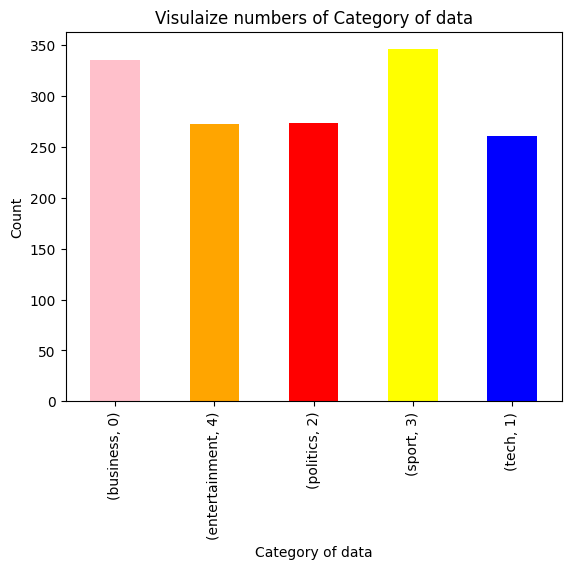

In [11]:
Training_Set.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.ylabel("Count")
plt.title("Visulaize numbers of Category of data")
plt.show()

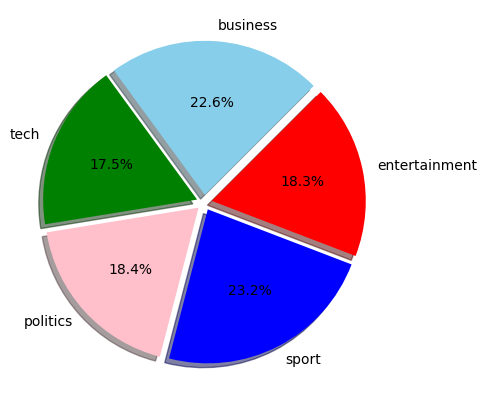

In [12]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue", "Green", "Pink", "Blue", "Red"]
business = Training_Set[Training_Set['CategoryId'] == 0 ]
tech = Training_Set[Training_Set['CategoryId'] == 1 ]
politics = Training_Set[Training_Set['CategoryId'] == 2]
sport = Training_Set[Training_Set['CategoryId'] == 3]
entertainment = Training_Set[Training_Set['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), 
         sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

In [13]:
Training_Set.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [14]:
# Add column with multiplicity (note: leave it as a string for a prettier plot)
Training_Set['text multiplicity'] = Training_Set.groupby('Text')['Text'].transform('count').astype(str) 

In [15]:
# Check how many categories are in each repeated text group
print('The maximum number of different categories assigned to repeated texts is: {}'.format(\
Training_Set[Training_Set['text multiplicity']!='1'].groupby('Text')['Category'].nunique().max()))

The maximum number of different categories assigned to repeated texts is: 1


This means that all articles with the same text are assigned to the same category, so they are simply duplicated articles. We will remove them.

In [16]:
Training_Set = Training_Set.drop_duplicates(subset=['Text'])

In [17]:
pd.DataFrame(Training_Set['Category'].value_counts())

,count
Category,
sport,342
business,335
politics,266
entertainment,263
tech,234


#### Punctuation removal and treatment of numbers
Since at some point we are going to count words, it may be necessary to remove punctuation. Also, let us inspect what the most common words are in a sample text.Let us check if the text was pre-processed.

In [18]:
print('*'*40)
print('Sample text:')
print('*'*40)
print(Training_Set['Text'][0])

print('\n'+'*'*40)
print('Frequency of punctuation marks in sample text:')
print('*'*40)
[print("  {} is {} times".format(c,Training_Set['Text'][0].count(c))) for c in ['.',',',';','?',':','!','"',"'",")","("]];

from collections import Counter
print('\n'+'*'*40)
print('Most common words in sample text:')
print('*'*40)
for word, count in Counter(Training_Set['Text'][0].split()).most_common(4):
    print("  '{}' is {} times".format(word, count))

****************************************
Sample text:
****************************************
worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she sa

Now, let us clean the text and inspect it.

Note: some methods such as TfidfVectorizer, CountVectorizer and TfidfTransformer actually ignore punctuation, but we remove it anyways. Alternatively, those words could be ignored when preprocessing the text.

In [19]:
def clean_text(df,keep_dots=False):
    """ cleans the column 'Text' in a DataFrame"""
    if keep_dots:
        clean_method = lambda x: clean_string(x,True)
    else:
        clean_method = clean_string
                
    try: # DataFrame
        return df['Text'].apply(clean_method)
    except KeyError: # Series
        return df.apply(clean_method)
    
def clean_string(s,keep_dots=False):
    """Cleans a string"""
    s = re.sub("\d+", " number ", s) # change numbers to word " number "
    if keep_dots:
        s = s.translate(s.maketrans("£,;:-", "$    ","()+-*!?%")) # replace £ with $ and remove punctuation       
    else:
        s = s.translate(s.maketrans("£.,;:-", "$     ","()+-*!?%")) # replace £ with $ and remove punctuation        
        s = s.replace("$ number", "money")
        s = s.replace("number bn", "money")
        s = s.replace("money bn", "money")
        s = s.replace("money   money", "money")
        s = s.replace("money money", "money")
        s = s.replace("number   number", "number")
        s = s.replace("number number", "number")
        return s

In [20]:
# Clean training set
pd.options.mode.chained_assignment = None
Training_Set['Text']=clean_text(Training_Set)
pd.options.mode.chained_assignment = "warn"

print('*** 3 Sample texts after cleaning: ***')
[print(Training_Set['Text'][i]+'\n') for i in range(3)]

*** 3 Sample texts after cleaning: ***
worldcom exboss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness   cynthia cooper  worldcom s exhead of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in  number   her warnings led to the collapse of the firm following the discovery of an money accounting fraud  mr ebbers has pleaded not guilty to charges of fraud and conspiracy   prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates  but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early  number  and  number   she said andersen had given a  green light  to the procedures

[None, None, None]

#### Basic inspection of the number of words
We will now inspect the word count in the dataset as a whole and per category.

In [21]:
pd.options.mode.chained_assignment = None
Training_Set['word count'] = Training_Set['Text'].apply(lambda row: len(row.split()))
Training_Set['char count'] = Training_Set['Text'].apply(lambda row: len(row))
pd.options.mode.chained_assignment = 'warn'
print("Training set including number of word and number of characters per entry: ")
Training_Set

Training set including number of word and number of characters per entry: 


,ArticleId,Text,Category,CategoryId,text multiplicity,word count,char count
0,1833,worldcom exboss launches defence lawyers defen...,business,0,1,299,1879
1,154,german business confidence slides german busin...,business,0,1,324,2053
2,1101,bbc poll indicates economic gloom citizens in ...,business,0,1,511,3215
3,1976,lifestyle governs mobile choice faster bett...,tech,1,1,631,3648
4,917,enron bosses in money m payout eighteen former...,business,0,1,364,2235
...,...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,4,1,228,1329
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,4,1,557,3162
1487,1590,weak dollar hits reuters revenues at media gro...,business,0,1,242,1429
1488,1587,apple ipod family expands market apple has exp...,tech,1,1,561,3318


As we can see below, the number of words per text varies between 90 and 3352. This is more than one order of magnitude:

In [22]:
print("Statistics about characters and word count in training set: ")

Training_Set.describe()

Statistics about characters and word count in training set: 


,ArticleId,CategoryId,word count,char count
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,1118.146528,1.975000,385.036806,2263.959028
std,642.822120,1.435938,211.599565,1221.994692
min,2.000000,0.000000,90.000000,507.000000
25%,560.750000,1.000000,253.000000,1480.000000
50%,1111.000000,2.000000,337.500000,1995.000000
75%,1681.250000,3.000000,468.250000,2789.500000
max,2224.000000,4.000000,3352.000000,18769.000000


In [23]:
data = Training_Set['word count']
data

0       299
1       324
2       511
3       631
4       364
       ... 
1485    228
1486    557
1487    242
1488    561
1489    294
Name: word count, Length: 1440, dtype: int64

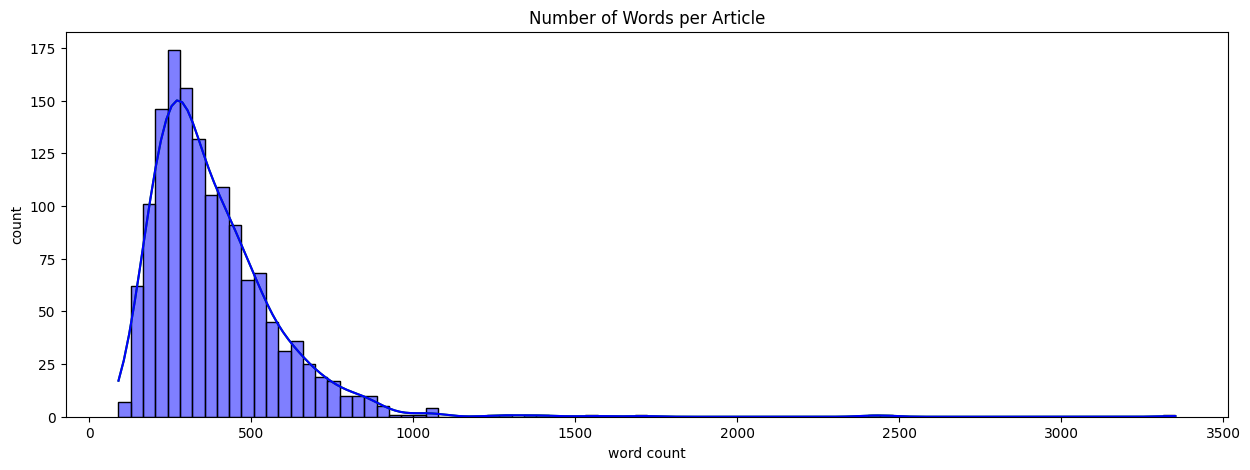

In [24]:
# Creating the figure and axes
fig = plt.subplots(figsize=(15, 5))

# Creating the histogram with KDE overlay
sns.histplot(data, kde=True, color='white')

# Customizing the KDE line color
kde = sns.histplot(data, kde=True, color='blue')
kde_lines = kde.get_lines()
kde_lines[0].set_color('green')

# Adding labels and title
plt.xlabel('word count')
plt.ylabel('count')
plt.title('Number of Words per Article')

# Displaying the plot
plt.show()

Let us now examine the word count statistics by category.

In [25]:
print('Word count statistics by category:')
G = Training_Set[['Category','word count']].groupby('Category')
G.describe()

Word count statistics by category:


word count                                                \
                   count        mean         std    min     25%    50%   
Category                                                                 
business           335.0  333.597015  132.663441  146.0  252.50  305.0   
entertainment      263.0  335.737643  204.777862  143.0  230.00  274.0   
politics           266.0  449.210526  260.855416   90.0  318.25  441.5   
sport              342.0  338.292398  187.036142  116.0  214.25  296.5   
tech               234.0  509.457265  213.427597  185.0  344.25  462.5   

                               
                  75%     max  
Category                       
business       388.50   907.0  
entertainment  380.00  2450.0  
politics       525.50  3352.0  
sport          417.75  1707.0  
tech           631.75  1557.0

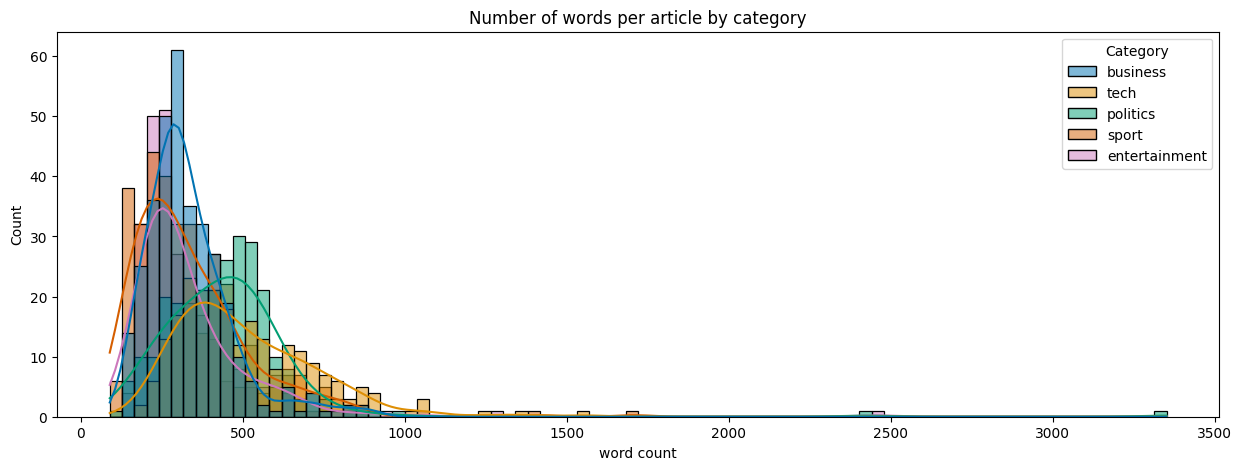

In [26]:
fig = plt.subplots(figsize=(15, 5))
sns.histplot(
    data = Training_Set, 
    x = 'word count',
    palette = 'colorblind',
    kde=True,
    hue = 'Category'
    )

plt.title("Number of words per article by category")
plt.show()

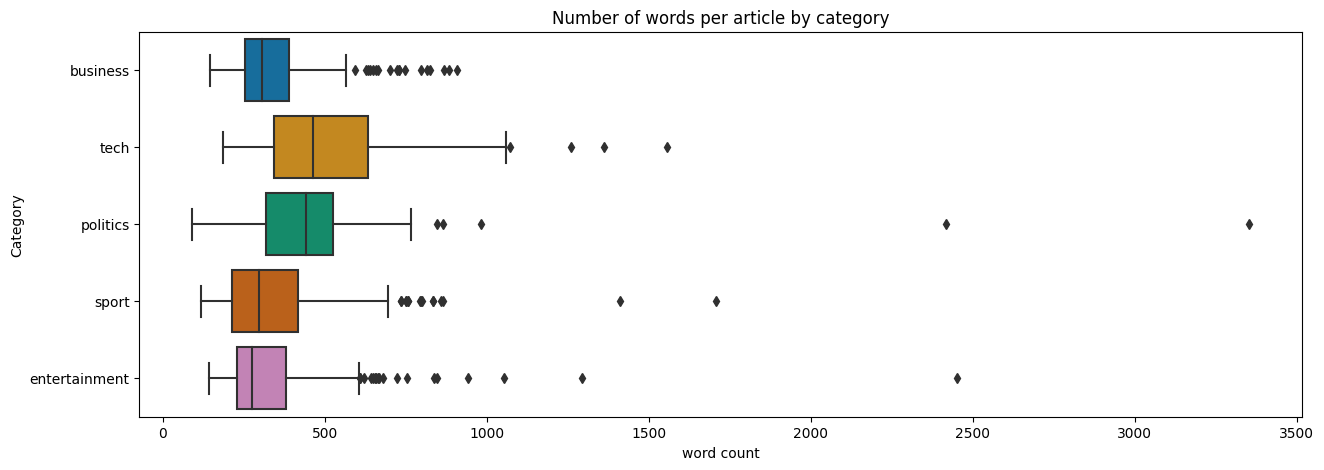

In [27]:
# words per category
fig = plt.subplots(figsize=(15, 5))
sns.boxplot(
    data = Training_Set, 
    x = 'word count', 
    y = 'Category',
    palette = 'colorblind'
    )

plt.title('Number of words per article by category')
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

#### Word count Matrix
We will now convert the text into a matrix. We will actually build 2 matrices where each column represents a word and each row represents a document. In this first part, we create and inspect the word count matrix WC, which is a very sparse matrix. This matrix contains the number of times each word is present in each article.

In [29]:
cv=CountVectorizer() 
WC=cv.fit_transform(Training_Set['Text'])
print('There are {} documents in the training set.'.format(len(Training_Set)))
print('There are {} different words in the training set.'.format(WC.shape[1]))
print('The sparse Matrix WC has size {} and its sparsity is {:.2f}%. '.format(WC.shape,100*(1-WC.count_nonzero()/np.prod(WC.shape))))
print('\nCorresponding DataFrame to WC:')
counts_df = pd.DataFrame(WC.A,columns=cv.get_feature_names_out ())
counts_df

There are 1440 documents in the training set.
There are 25277 different words in the training set.
The sparse Matrix WC has size (1440, 25277) and its sparsity is 99.23%. 

Corresponding DataFrame to WC:


,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aaron,abacus,...,zonealarm,zones,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
print('The most popular words amog all documents are are:')
print('\nword  count')
print(counts_df.sum().sort_values().tail(10))

The most popular words amog all documents are are:

word  count
it         5024
that       5072
is         5337
for        5611
number    10408
in        11365
and       11931
of        12562
to        15998
the       33919
dtype: int64


A seen above, the most popular words are uninformative about the topics. This is why we do not use the raw word count, but we scale it by the inverse term frequency, so that more weight is given to words that are unique or seldom to each document. Actually, since we have the labels indicating categories, if we could find words that were unique to each category and present in most of the articles within their category, we can build a very simple classifier. Normally, this wouldn't be the case (i.e., topic extraction is an application of unsupervised learning). But since we have the text categories (topics), let us check if there are words unique to each topic and how popular they are!

In [31]:
#Include category column into word count
counts_df['_category_'] = Training_Set['Category']

print('Word count by category')
G = counts_df.groupby('_category_').sum()
G

Word count by category


,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aaron,abacus,...,zonealarm,zones,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
_category_,,,,,,,,,,,,,,,,,,,,,
business,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
entertainment,0,0,1,0,0,0,0,0,0,0,...,0,3,0,1,1,0,0,2,0,3
politics,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,3,0,0
sport,0,3,0,0,3,0,1,0,1,0,...,0,1,0,1,0,0,1,1,1,1
tech,0,0,0,3,0,4,0,0,1,1,...,1,0,2,0,0,2,0,1,0,0


In [32]:
is_unique = G.astype(bool).sum(axis = 0) == 1
total_word_count = G.sum(axis = 0)

a = total_word_count[is_unique]
b = G.idxmax(axis = 0)[is_unique]
c = cv.get_feature_names_out()[is_unique]

unique_words = pd.DataFrame(data = zip(a, b), index = c, columns = ['unique word count', 'Category'])
print('Unique words per category: ')
unique_words.groupby('Category').describe()

Unique words per category: 


unique word count                                              
                          count      mean       std  min  25%  50%  75%   max
Category                                                                     
business                 2779.0  1.391868  1.035416  1.0  1.0  1.0  1.0  13.0
entertainment            2253.0  1.343098  1.063229  1.0  1.0  1.0  1.0  12.0
politics                 2009.0  1.428074  1.278043  1.0  1.0  1.0  1.0  28.0
sport                    2872.0  1.362813  1.093336  1.0  1.0  1.0  1.0  24.0
tech                     2149.0  1.396929  1.195589  1.0  1.0  1.0  1.0  18.0

In [33]:
print('Top 10 Unique words and their count per category: ')
C = unique_words.groupby('Category')
U = C.max()
U['top unique word'] = C.idxmax().iloc[:, 0]
U
for category, g, in C:
    print('\nCategory: ', category, '\n', g['unique word count'].nlargest(10).to_markdown())

Top 10 Unique words and their count per category: 

Category:  business 
 |            |   unique word count |
|:-----------|--------------------:|
| qantas     |                  13 |
| monsanto   |                  10 |
| ufj        |                  10 |
| arnesen    |                   9 |
| bofra      |                   9 |
| jol        |                   9 |
| pernod     |                   9 |
| ssl        |                   9 |
| bombardier |                   8 |
| greer      |                   8 |

Category:  entertainment 
 |            |   unique word count |
|:-----------|--------------------:|
| ahold      |                  12 |
| hailey     |                  12 |
| carnival   |                  11 |
| roundabout |                  11 |
| conti      |                  10 |
| elgindy    |                  10 |
| painkiller |                  10 |
| absa       |                   9 |
| binge      |                   9 |
| purushotma |                   9 |

Category:

### Word count by term-frequency-inverse document frequency

#### Application of term-frequency-inverse document frequency without filtering words

We will now apply this technique to the training dataset and get a weighted version of WC which we will call WC2.

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer 

In [35]:
tfidf_transformer = TfidfTransformer()
WC2 = tfidf_transformer.fit_transform(WC)

tfidf_df = pd.DataFrame(WC2.A, columns  = cv.get_feature_names_out())
print("WC2 matrix representation: ")
tfidf_df

WC2 matrix representation: 


,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aaron,abacus,...,zonealarm,zones,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
print("Ranking of word scores in WC2: ")
print("\n->column sum:")
print(tfidf_df.sum().sort_values().tail())

Ranking of word scores in WC2: 

->column sum:
in     105.870227
and    106.016738
of     111.841852
to     142.631549
the    304.578104
dtype: float64


Again, common words have the highest overall score (maybe it would be better to remove popular english words?). However, we can confirm that the individual values have been appropiately weighted by the inverse term frequency. Let us check those weights.

In [37]:
print("Weights given to words by idf:")
pd.DataFrame(tfidf_transformer.idf_,
            cv.get_feature_names_out(),
            columns = ["idf_weights"]).sort_values(by="idf_weights")

Weights given to words by idf:


,idf_weights
the,1.000000
to,1.004172
of,1.007663
in,1.008362
and,1.010464
...,...
fascination,7.579945
fascinating,7.579945
fascinate,7.579945
fastow,7.579945


In [38]:
# Divide the words into 3 categories (unique,intermideate,universal) and merge them into a dataframe with column type:

print("Subset of the words that are in all categories (universal words):")
is_in_all_cats = G.astype(bool).sum(axis=0)==5
universal_words = pd.DataFrame(WC.getnnz(axis=0)[is_in_all_cats], # nnz = number of nonzero entries per column (count of articles with word)
                               index=G.columns[is_in_all_cats]._data,
                               columns=['#of Articles with this word'])


Subset of the words that are in all categories (universal words):


In [39]:
#Divide the words into 3 categories (unique, intermideate, universal) and merge them into a dataframe with column type:
print("Subset of the words that are in all categories (universal words): ")
is_in_all_cats = G.astype(bool).sum(axis = 0)==5
universal_words = pd.DataFrame(WC.getnnz(axis=0)[is_in_all_cats], #nnz = number of nonzero entries per column (count of articles with word)
                              index = G.columns[is_in_all_cats]._data,
                              columns = ['Number of Articles with this word'])
universal_words.describe()

Subset of the words that are in all categories (universal words): 


,Number of Articles with this word
count,3920.00000
mean,57.88801
std,125.26236
min,5.00000
25%,14.00000
50%,24.00000
75%,52.00000
max,1440.00000


[Text(0.5, 1.0, 'Presence of universal words in articles'),
 Text(0.5, 0, 'Number of articles with this word')]

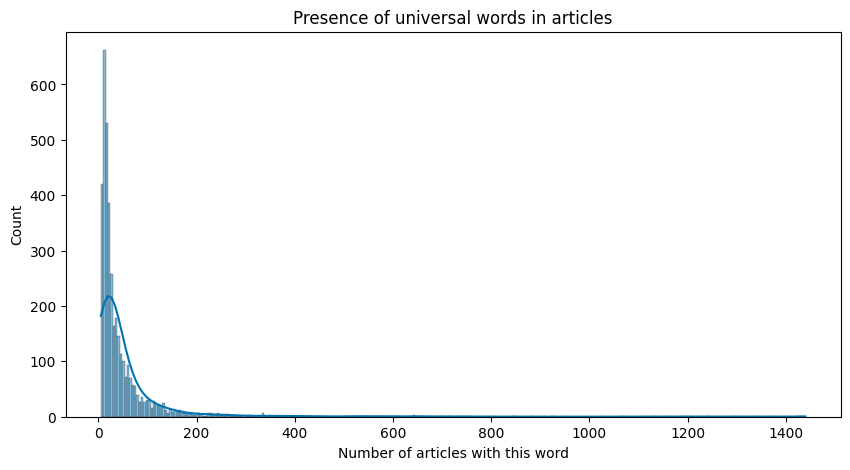

In [40]:
fig, axs = plt.subplots(ncols=1,figsize=(10, 5))
sns.histplot(
    ax=axs,
    data = universal_words, 
    legend = False,
    palette = 'colorblind',
    kde = True,
    ).set(
       title = 'Presence of universal words in articles',
    xlabel='Number of articles with this word')

Notice that there are 3920 words common to all 5 categories, and they can be present in . While the presence of those words might not be indicative of a topic, their frequency within an article might be useful for topic discrimination, so we do not remove all these universal words. The most common universal word is present in all 1440 articles, and the rarest of them in only 5 articles, with a median of 24 articles. The cumulative plot on the right help us notice how many repeated words.

In [41]:
print("These are the 50 most common universal words: ")
print(universal_words.iloc[:, 0].nlargest(50))
print("\nRemark: The word money is found in {} article".format(universal_words.loc['money'][0]))

These are the 50 most common universal words: 
the       1440
to        1434
of        1429
in        1428
and       1425
number    1370
for       1335
on        1296
it        1246
is        1239
said      1226
with      1202
that      1194
has       1185
was       1157
at        1135
be        1113
by        1113
as        1074
have      1073
but       1069
from      1024
will       949
an         927
are        922
he         910
not        885
this       850
which      850
been       844
had        803
also       792
they       752
would      742
their      733
up         732
who        719
were       714
more       701
after      662
one        659
his        652
its        648
we         646
year       644
new        643
out        642
about      623
there      609
over       604
Name: Number of Articles with this word, dtype: int64

Remark: The word money is found in 564 article


The word 'the' is present in all 1440 articles. Interestingly, when we replaced numbers with that did not represent money with the word 'number', we put this word in 1370 articles. However, the word 'money' is more scarce, but it will turn out to be more important.

### Building and training models
#### Split train set into training and train and cross validation
After removing duplicate entries, we split 20% of the data into a separate cross validation dataset, keeping the same proportion of classes in each subset.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_df = pd.read_csv("BBC News Train.csv").drop_duplicates(subset=['Text'])
test_df = pd.read_csv("BBC News Test.csv")
train_df, crossval_df = train_test_split(train_df,stratify=train_df[['Category']],test_size=0.2,random_state = 310)
print('Training set:')
train_df

Training set:


,ArticleId,Text,Category
633,1805,dublin hi-tech labs to shut down dublin s hi-t...,tech
457,1717,regiments group in poll move a regiments cam...,politics
1233,555,bnp leader nick griffin arrested the leader of...,politics
1372,557,barbarians 19-47 new zealand new zealand prove...,sport
489,563,cable offers video-on-demand cable firms ntl a...,tech
...,...,...,...
625,814,us budget deficit to reach $368bn the us budge...,business
1093,70,indonesia declines debt freeze indonesia no ...,business
1068,825,prime minister s questions so who if anyone ...,politics
470,1686,de niro completes box office coup robert de ni...,entertainment


In [44]:
print('Cross validation set:')
crossval_df

Cross validation set:


,ArticleId,Text,Category
936,1714,bmw drives record sales in asia bmw has foreca...,business
196,1696,new yob targets to be unveiled fifty new are...,politics
793,660,beckham rules out management move real madrid ...,sport
851,2185,japanese mogul arrested for fraud one of japan...,business
668,328,nadal marches on in mexico rafael nadal contin...,sport
...,...,...,...
201,601,snow patrol feted at irish awards snow patrol ...,entertainment
1485,857,double eviction from big brother model caprice...,entertainment
1477,883,web logs aid disaster recovery some of the mos...,tech
92,212,straw attacked on china arms moves to lift the...,politics


#### Build a class to preprocess data and compute WC2 with tf-idf.
A class is created to save generate matrix WC2 for train, cross validation and test sets. This class also contains some helper functions for plotting, fitting, and predicting.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
class MyData(object):
    """
    Represent text data as a sparse matrix with TfidfVectorizer
    Note: This class does not follow sklearn syntax. 
    """
    def __init__(self,df,TfidfVec=None,clean_text=True,**TtdifVec_kwargs):
        """
        Inputs:
        -df: a DataFrame including column "Text"
        -TfidfVec: previously fitted TfidfVectorizer object (pass None for a new fit)        
        -clean_text: if True, 'Text' column will be cleaned.
        -TtdifVec_kwargs: parameters to pass when the TfidfVectorizer is created
        Fields:
        -MyData.words: list of words used by TfidfVec
        -MyData.tv: fitted TfidfVectorizer object
        -MyData.WC2: Sparse matrix representation of the text
        """
        self.df = df.copy()
        if clean_text:
            self.clean_text()
        self.get_WC2(TfidfVec,**TtdifVec_kwargs)
    def clean_text(self):
        self.df['Text'] = clean_text(self.df)
    def get_WC2(self,TfidfVec=None,**TtdifVec_kwargs):
        """
        Fit TfidfVectorizer to text and return a sparse matrix from tf-idf
        """
        if TfidfVec is None:
            # This is fit only done with the training data set.
            if len(TtdifVec_kwargs)==0:
                # Fit with default parameters
                self.tv = TfidfVectorizer(min_df=0.004,max_df=0.417)  
            else:
                # Fit with user defined parameters
                self.tv = TfidfVectorizer(**TtdifVec_kwargs)
                
            self.WC2 = self.tv.fit_transform(self.df['Text'])
        else:
            # The user passed the training TfidfVectorizer object
            self.tv = TfidfVec  
            self.WC2 = self.tv.transform(self.df['Text'])
        self.words = self.tv.get_feature_names_out()
        
    def get_WC2_as_df(self):
        """Converts the sparse matrix WC2 into a full DataFrame"""
        return pd.DataFrame(self.WC2.A,columns=self.words)
    def __repr__(self):
        return "MyData( nwords={} )".format(self.WC2.shape)
    def __str__(self):
        return  self.__repr__()
    
    @staticmethod
    def plot_confusion_matrix(y_true,y_pred,title='Confusion Matrix'):        
        labels = list(set(y_pred).union(set(y_true)))        
        cm = metrics.confusion_matrix(y_true,y_pred,labels=labels)
        fig, ax = plt.subplots(figsize=(7, 6))
        sns.heatmap(cm, annot=True, fmt='g',ax=ax);
        # labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title(title); 
        ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
        
train_data = MyData(train_df)
crossval_data = MyData(crossval_df,train_data.tv)
test_data = MyData(test_df,train_data.tv)
print('WC2 in training data set has size:',train_data.WC2.shape)
print('WC2 in crossval_data data set has size:',crossval_data.WC2.shape)
print('WC2 in test_data data set has size:',test_data.WC2.shape)

WC2 in training data set has size: (1152, 6067)
WC2 in crossval_data data set has size: (288, 6067)
WC2 in test_data data set has size: (735, 6067)


#### Build a Non-negative matrix factorization (NMF) model from training data.
##### Brief explanation
In NMF, we will factor the matrix WC2 as the product of 2 nonnegative matrices W and H:

#### WC2 = WH
 
If WC2 has size  
m
 x 
n
 , then W has size  
m
 x 
p
  and H is a  
p
 x 
n
  matrix.

#### Computing W and H
Next, we will compute the matrix factorization of the training data set with the help of NMF from scikitlearn. There is actually no need to compute the topics from H,

In [47]:
from sklearn import metrics

In [48]:
class MyNMF(object):
    """
    NMF model with helper methodsMyData obj
    Note: This class does not follow sklearn syntax. 
          I did refactor it but I was unable to make it work with categorical predictions,
          so all changes were undone.
    """
    def __init__(self, n_topics,**fit_params):
        """
        Inputs:
        -Xtrain_data: a MyData object
        -n_topics: number o topics to represent text
        -**fit_params: optional kwargs to pass when sklearn's NMF object is created
        """        
        self.n_topics = n_topics
        self.fit_params = fit_params        
        self.mapping_dict = None
    def fit(self,Xtrain_data,ytrain=None):
        # Default values
        self.fit_params['n_components'] = self.n_topics
        self.fit_params['beta_loss'] = self.fit_params.get('beta_loss',"frobenius")
        self.fit_params['init'] = self.fit_params.get('init',"nndsvda")
        
        # Fit NMF model and store matrix W such that WC2 = W*H
        self.model_ = NMF(**self.fit_params).fit(Xtrain_data.WC2)
        self.words_ = Xtrain_data.words
        
        
        if ytrain is None:
            # Trivial categories
            self.mapping_dict_ = {i:i for i in range(self.n_topics)}
            return self
        
        W = self.transform(Xtrain_data)
        pred_ids = self.predict_topic_ids(W)
        self.train_score_, _, _ = self.match_topic_ids_to_categories(pred_ids,ytrain)        
        return self
    
    def predict(self,Xdata):
        W = self.transform(Xdata)
        pred_ids = self.predict_topic_ids(W)
        y_pred = self.map_topic_id_to_cats(pred_ids)
        return y_pred
    def transform(self,Xdata):
        W = self.model_.transform(Xdata.WC2)
        return W     
    def predict_topic_ids(self,W):    
        """ Returns indexes of largest rows in W for NMF model. There are the predicted topic ids per article"""
        return [np.argmax(row) for row in W]
    
    def match_topic_ids_to_categories(self,pred_ids,y_true,
                                      metric=metrics.accuracy_score):
        """        
        Try permutations to map pred_ids with the categories in y_true by maximizing a given metric
        Inputs:
        - pred_ids: vector of predicted topic ids (from matrix W)
        - y_true: true categories. (Category column in dataframe)
        - metric: desired metric function with args metric(y_true,y_pred) to be maximized. Default: accuracy_score
        Returns:
        - best_metric: achieve score
        - y_pred_best: list of predicted categories
        - best_perm: dictionary containing the mapping of unique values in pred_ids to each category
        """
        
        # It could be the case that there is a different number of unique elements in pred_ids and y_true.        
        # We force the mapping to fit into the categories in y_true        
        cats = set(y_true) 
        num_cats = len(cats)                      
        
        # initial guess
        id_to_cat = {i:c for i,c in enumerate(cats)} # we try all permutations of the keys of this dictionary  
        
        y_pred_best = [id_to_cat[c] for c in pred_ids]        
        best_metric = metric(y_true,y_pred_best)
        best_perm = id_to_cat
        # Find a permutation to maximize given metric
        for perm_ids in permutations(id_to_cat):
            id_to_cat = {i:c for i,c in zip(perm_ids,cats)}
            y_pred = [id_to_cat[c] for c in pred_ids] 
            curr_metric = metric(y_true,y_pred)
            if curr_metric>best_metric:
                best_metric = curr_metric
                y_pred_best = y_pred
                best_perm = id_to_cat   
        self.mapping_dict_ = best_perm
        return best_metric,y_pred_best,best_perm
    
    def map_topic_id_to_cats(self,pred_ids,mapping_dict=None):
        """
        Convert column indexes in W to categories based on a mapping dictionary
        """
        if mapping_dict is None: mapping_dict = self.mapping_dict_
        return list(map(lambda ix: mapping_dict[ix],pred_ids))
    
    def get_topic_words(self,n_words):
        """"
        Get dictionary with topic id and n words per topic from matrix H in NMF
        Inputs:
        - n_words: number of words to represent each topic
        """ 
        # Matrix H: each column is a word, each row is a topic.
        # Words with highest scores are representative of a topic
        H = self.model_.components_ 
        
        topic_names = [self.mapping_dict_[k] for k in range(self.n_topics)]
        
        topics_dict = {topic_names[k]: list(self.words_[MyNMF.get_ind_largest(row,n_words)]) \
                       for k,row in enumerate(H)}        
        return topics_dict
    
    def print_top_words(self,n_words:int =4):        
        """Print a list of top words and the corresponding topic"""
        print('Top {} words per topic:'.format(n_words))
        topics_dict = self.get_topic_words(n_words)
        [print('words: {} => topic: {}'.format(v,k)) for k,v in topics_dict.items()];
        
    def __repr__(self):
            return "NMF model  with {} words and {} topics".format(len(self.words_),self.n_topics)
    def __str__(self):
            return self.model_.__str__()         
    @staticmethod
    def get_ind_largest(x,k):
        """
        Return indexes of k largest components in a 1 D numpy array.
        (Fast method)
        """        
        ind_largest= x.argpartition(-k)[-k:] # this is O(n), but unsorted.
        return ind_largest[np.argsort(-x[ind_largest])]    
    @staticmethod
    def plot_topic_words(H, words, n_words, title,word_types=None):
        """Producs a bar plot for each predicted NMF topic showing the highest n scores and their words per topic"""
        num_topics = H.shape[0]
        ncols = 5
        nrows = int(np.ceil(num_topics/ncols))
        fig, axes = plt.subplots(nrows, ncols, figsize=(30, 8), sharex=True)
        axes = axes.flatten()
        for topic_idx, topic in enumerate(H):
            ind_largest = MyNMF.get_ind_largest(topic,n_words)
            top_words = words[ind_largest]
            weights = topic[ind_largest]
            ax = axes[topic_idx]
            ax.barh(top_words, weights, height=0.5)
            ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 25})
            ax.invert_yaxis()
            ax.tick_params(axis="both", which="major", labelsize=16)
            for i in "top right left".split():
                ax.spines[i].set_visible(False)                
            fig.suptitle(title, fontsize=30)
            
            # What is the type of the most representative word?
            if word_types is not None: print_word_type_and_count(top_words[0],word_types)

In [49]:
from sklearn.decomposition import NMF

In [50]:
# Although these methods are implemented in the class, 
# they are done here as a script for an easier understanding of the method.
n_top_words = 4
n_topics = 5
print('*'*55)
print('  Performing NMF X = W*H with {} topics on training set'.format(n_topics))
print('*'*55)
nmf_model = NMF(n_topics,
                beta_loss='frobenius',
               init='nndsvda')
W_train =nmf_model.fit_transform(train_data.WC2)

H_train = nmf_model.components_
print('The chosen latent dimension p is:',n_topics)
print('The size of W for training set is:',W_train.shape)
print('The size of H for training set is:',H_train.shape)
print('=>W train:\n',W_train)
print('=>H train:\n',H_train)

*******************************************************
  Performing NMF X = W*H with 5 topics on training set
*******************************************************
The chosen latent dimension p is: 5
The size of W for training set is: (1152, 5)
The size of H for training set is: (5, 6067)
=>W train:
 [[0.01309543 0.02420656 0.02717872 0.         0.14244469]
 [0.11134815 0.0239759  0.00379673 0.         0.        ]
 [0.03714168 0.0068375  0.         0.02078286 0.        ]
 ...
 [0.15175303 0.01400931 0.         0.         0.        ]
 [0.         0.00194062 0.05361437 0.13354281 0.        ]
 [0.00926099 0.0049991  0.         0.         0.19625667]]
=>H train:
 [[0.00916039 0.         0.00831057 ... 0.00467128 0.00075481 0.        ]
 [0.00095893 0.         0.00278387 ... 0.0096934  0.00727489 0.01019704]
 [0.00274724 0.00116876 0.         ... 0.00297499 0.00785333 0.00040744]
 [0.00533267 0.02411599 0.         ... 0.         0.00150971 0.        ]
 [0.         0.00169135 0.0010767  ..

#### Interpreting matrices W and H in NMF
By inspecting H for the training set, we ask ourselves what are the relevant words for each topic. This is done blow, where results are also plotted, showing the main words per topic.

In [51]:
print("H train contains coefficients to p={} rows (topics), each defined by a combination of {} words.".format(*H_train.shape))
print("We will represent each topic (row) with the {} words that have the largest coefficient in H".format(n_top_words))

topics = {i:list(train_data.words[MyNMF.get_ind_largest(row,n_top_words)])  for i,row in enumerate(H_train)}
print(topics)

for i,row in enumerate(H_train):
    ind_largest = MyNMF.get_ind_largest(row,n_top_words)
    print('\nTopic in Row {} is represented by the words: \n{} with coefficients:\n{}'.format(
        i,train_data.words[ind_largest],np.round(row[ind_largest],2)))
print('\nCompare these words to the official categories:\n',set(train_data.df['Category']))

H train contains coefficients to p=5 rows (topics), each defined by a combination of 6067 words.
We will represent each topic (row) with the 4 words that have the largest coefficient in H
{0: ['mr', 'labour', 'blair', 'election'], 1: ['england', 'game', 'win', 'wales'], 2: ['money', 'us', 'growth', 'economy'], 3: ['film', 'best', 'her', 'awards'], 4: ['mobile', 'people', 'phone', 'technology']}

Topic in Row 0 is represented by the words: 
['mr' 'labour' 'blair' 'election'] with coefficients:
[0.93 0.74 0.67 0.6 ]

Topic in Row 1 is represented by the words: 
['england' 'game' 'win' 'wales'] with coefficients:
[0.38 0.32 0.25 0.23]

Topic in Row 2 is represented by the words: 
['money' 'us' 'growth' 'economy'] with coefficients:
[0.73 0.35 0.32 0.26]

Topic in Row 3 is represented by the words: 
['film' 'best' 'her' 'awards'] with coefficients:
[0.89 0.48 0.39 0.35]

Topic in Row 4 is represented by the words: 
['mobile' 'people' 'phone' 'technology'] with coefficients:
[0.36 0.34 0.25

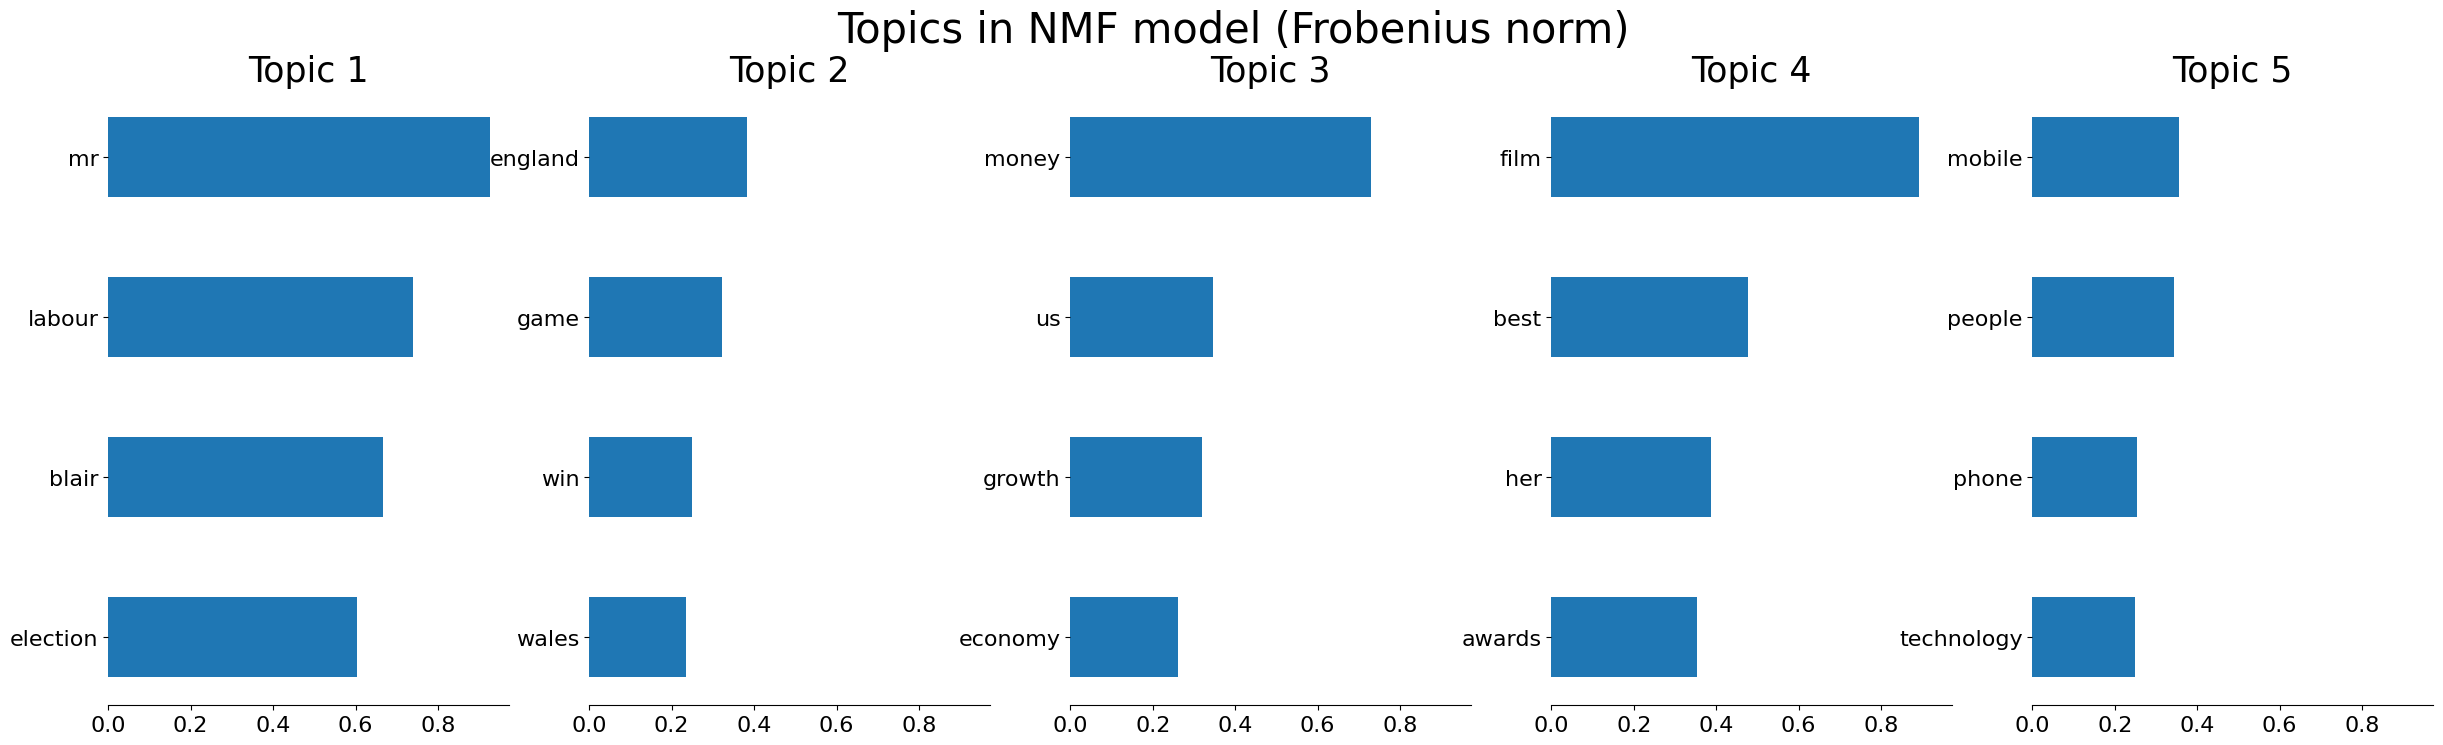

In [52]:
MyNMF.plot_topic_words(H_train,train_data.words,n_top_words,
               "Topics in NMF model (Frobenius norm)")

As you can see, the word 'money' incorporated during text preprocessing has the highest score for one of the topics!

Apparently, a topic with terms such as 'election', and 'blair' corresponds to the category politics, and so on. But now we should inspect the dominant topic for each article or document, and this is done by finding the largest value of each row in matrix W.

In [53]:
print('Training set with category and predicted topics:')
t_df= train_df.copy()
t_df['predicted_topics']=[topics[np.argmax(article)] for article in W_train]
t_df['predicted_topic_id']=[np.argmax(article) for article in W_train]
t_df['cat_id']=t_df['Category'].factorize()[0]
t_df

Training set with category and predicted topics:


,ArticleId,Text,Category,predicted_topics,predicted_topic_id,cat_id
633,1805,dublin hi-tech labs to shut down dublin s hi-t...,tech,"[mobile, people, phone, technology]",4,0
457,1717,regiments group in poll move a regiments cam...,politics,"[mr, labour, blair, election]",0,1
1233,555,bnp leader nick griffin arrested the leader of...,politics,"[mr, labour, blair, election]",0,1
1372,557,barbarians 19-47 new zealand new zealand prove...,sport,"[england, game, win, wales]",1,2
489,563,cable offers video-on-demand cable firms ntl a...,tech,"[mobile, people, phone, technology]",4,0
...,...,...,...,...,...,...
625,814,us budget deficit to reach $368bn the us budge...,business,"[money, us, growth, economy]",2,4
1093,70,indonesia declines debt freeze indonesia no ...,business,"[money, us, growth, economy]",2,4
1068,825,prime minister s questions so who if anyone ...,politics,"[mr, labour, blair, election]",0,1
470,1686,de niro completes box office coup robert de ni...,entertainment,"[film, best, her, awards]",3,3


#### Remarks:

* We see that there is a match between category column and the key words in the column predicted_topics, which is predicted by NMF. This is quite impressive, since NMF is an unsupervised model, which means it did not have access to the categories while training.
* Notice that the column predicted_topic id does not match the cat_id. This is simply a reordering problem, where we should try different permutations to find the best mapping. This has been implemented as a class method to get y_pred, a vector of predicted categories (the implemented method matches predicted_topic_id directly to the Category, so there is no need to compute the columns predicted_topics and cat_id).

It is finally time to see the predictions!

In [54]:
from itertools import permutations

In [55]:
# Repeat the above calculations using class methods from MyNMF:
y_true_train = train_data.df['Category']
nmf_model = MyNMF(n_topics=5).fit(train_data,y_true_train)
y_pred_train = nmf_model.predict(train_data)
acc = metrics.accuracy_score(y_true_train,y_pred_train)
nmf_model.print_top_words(10)

print('\nNMF predictions for the training set. (Accuracy = {:.3f}%)'.format(acc*100))
t_df= train_df.copy()
t_df['predicted Category (y_pred)']=y_pred_train
t_df

Top 10 words per topic:
words: ['mr', 'labour', 'blair', 'election', 'party', 'brown', 'government', 'minister', 'prime', 'howard'] => topic: politics
words: ['england', 'game', 'win', 'wales', 'ireland', 'against', 'you', 'france', 'side', 'cup'] => topic: sport
words: ['money', 'us', 'growth', 'economy', 'sales', 'market', 'oil', 'dollar', 'bank', 'economic'] => topic: business
words: ['film', 'best', 'her', 'awards', 'she', 'award', 'actor', 'actress', 'films', 'won'] => topic: entertainment
words: ['mobile', 'people', 'phone', 'technology', 'users', 'can', 'or', 'software', 'net', 'you'] => topic: tech

NMF predictions for the training set. (Accuracy = 90.365%)


,ArticleId,Text,Category,predicted Category (y_pred)
633,1805,dublin hi-tech labs to shut down dublin s hi-t...,tech,tech
457,1717,regiments group in poll move a regiments cam...,politics,politics
1233,555,bnp leader nick griffin arrested the leader of...,politics,politics
1372,557,barbarians 19-47 new zealand new zealand prove...,sport,sport
489,563,cable offers video-on-demand cable firms ntl a...,tech,tech
...,...,...,...,...
625,814,us budget deficit to reach $368bn the us budge...,business,business
1093,70,indonesia declines debt freeze indonesia no ...,business,business
1068,825,prime minister s questions so who if anyone ...,politics,politics
470,1686,de niro completes box office coup robert de ni...,entertainment,entertainment


#### Evaluating NMF model performance
Evaluating the performance of an unsupervised model is not a straightforwardly. But in this case we have access to the predicted category. So this is seen as a supervised classification problem, where the Category column is the ground truth or y_true variable, which is compared with predicted categoryto produce a confusion matrix with 5 classes.

#### Model Performance in training set


Accuracy for training set based on NMF: 90.365%


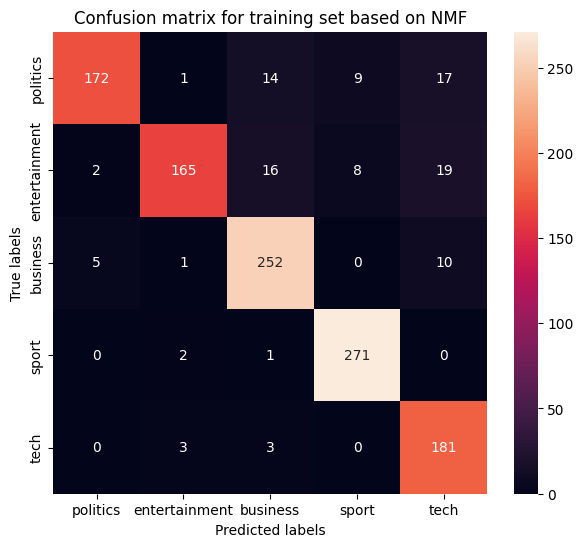

In [56]:
#Compute accuracy and confusion matrix.
print('\nAccuracy for training set based on NMF: {:.3f}%'.format(acc*100))
MyData.plot_confusion_matrix(y_true_train,y_pred_train,'Confusion matrix for training set based on NMF')

##### Model Performance in cross validation set


Accuracy for cross val set based on NMF: 86.458%


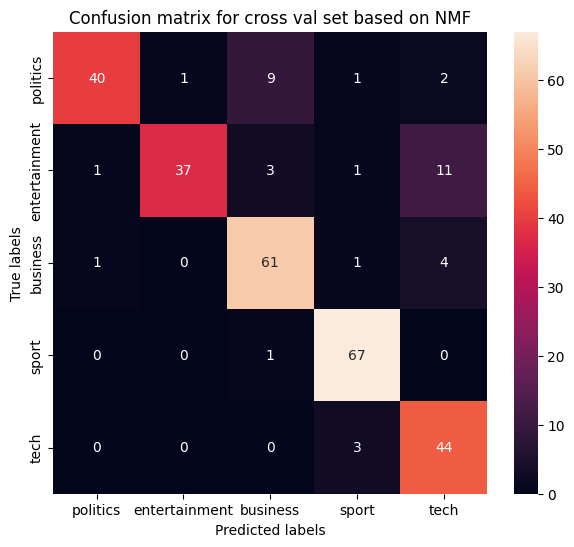

In [57]:
# Evaluate model with cross validation data
y_pred_cv = nmf_model.predict(crossval_data)
y_true_cv = crossval_data.df['Category']
acc = metrics.accuracy_score(y_true_cv,y_pred_cv)
print('\nAccuracy for cross val set based on NMF: {:.3f}%'.format(acc*100))
MyData.plot_confusion_matrix(y_true_cv,y_pred_cv,'Confusion matrix for cross val set based on NMF')

The NMF model trained on the training set yields a similar accuracy on the validation set. This means it has generalizaton capabilities, and a similar accuracy can be expected for the test set.

#### NMF predictions on test set
The NMF model is now trained and cross validated. We can use it to predict categories on the test set, where we do not have the actual categories to compare.

In [58]:
# Predict categories
y_pred_test = nmf_model.predict(test_data)
t_df = test_data.df.copy()
t_df['predicted Category']=y_pred_test
print('Predicted categories on testing set:')
t_df

Predicted categories on testing set:


,ArticleId,Text,predicted Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,sport
3,459,india s reliance family feud heats up the ongo...,business
4,1020,boro suffer morrison injury blow middlesbrough...,sport
...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,business
731,373,u number to play at grammy awards show irish ...,entertainment
732,1704,sport betting rules in spotlight a group of mp...,tech
733,206,alfa romeos to get gm engines fiat is to sto...,business


Recall that the submission file should be a CSV with 2 columns: Articleid and Category. So we delete the Text column and we are ready to send a first submission file.

In [59]:
# DataFrame for submission
nmf_predictions = test_data.df.copy()
nmf_predictions['Category']=y_pred_test
nmf_predictions.drop("Text",axis=1,inplace=True)
nmf_predictions

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,tech
733,206,business


##### We are not yet ready to submit! 
So far, we have found a model fit with an estimated accuracy around 88%. It is tempting to submit these results, but we can do much better by using a few strategies.

#### Strategies to improve accuracy of NMF model.
If we want to reach the leaderboard in this problem, we need an accuracy above 95%. Let us try some approaches:

#### Use more data.
Try different hyperparameters.

##### Bagging.
More data: do not split the original training set into cross validation and training sets.
From learning curves, we know that if a model has enough complexity, training it with more data yields better predicions (check the section about learning curves in this notebook). We could use k-fold validation with the full dataset to estimate model accuracy and keep more data for training. However, given that NMF is an unservised method, and because the imlementation of our classes is not compatible with sklearn default methods for this, we will simply train it with the full dataset and evaluate the accuracy of the model on the same training data. Actually, you will notice that cross validation an training accuracies, as computed before, are very similar for NMF models(they differ within 2% in absoulte terms), so the traning accuracy is not such a bad estimate of the unsupervised model accuracy.

Let us train an NMF model with the full dataset using the same setup as before and check the training accuracy.

***Model trained with full training set:***
Top 10 words per topic:
words: ['mr', 'labour', 'blair', 'election', 'brown', 'party', 'government', 'minister', 'howard', 'prime'] => topic: politics
words: ['england', 'game', 'win', 'against', 'wales', 'cup', 'you', 'ireland', 'side', 'first'] => topic: sport
words: ['money', 'us', 'growth', 'economy', 'sales', 'market', 'oil', 'bank', 'firm', 'economic'] => topic: business
words: ['film', 'best', 'awards', 'her', 'award', 'she', 'actor', 'actress', 'won', 'films'] => topic: entertainment
words: ['people', 'mobile', 'music', 'phone', 'technology', 'or', 'can', 'you', 'users', 'digital'] => topic: tech

Accuracy for full training+cross val set based on NMF trained with full data set: 88.681%


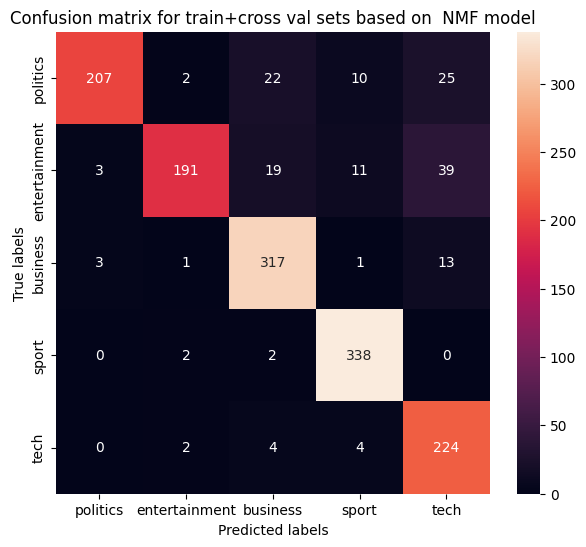

In [60]:
# Repeat model fit including the full data set
train_df_full = pd.read_csv("BBC News Train.csv").drop_duplicates(subset=['Text'])
train_data_full = MyData(train_df_full)
y_true_train = train_data_full.df['Category']

nmf_model = MyNMF(5).fit(train_data_full,y_true_train)
y_pred_train = nmf_model.predict(train_data_full)
acc = metrics.accuracy_score(y_true_train,y_pred_train)
print('***Model trained with full training set:***')
nmf_model.print_top_words(10)
print('\nAccuracy for full training+cross val set based on NMF trained with full data set: {:.3f}%'.format(acc*100))
MyData.plot_confusion_matrix(y_true_train,y_pred_train,'Confusion matrix for train+cross val sets based on  NMF model')

#### Conclusion:

* Augmenting the size of the training set does not lead to a significant increase in accuracy of the NMF model (at least with these parameters)

#### Grid search for best NMF models
In our pipeline to produce an NMF model, we made some choices that affect performance, such as:

* The word embedding used and its hyperparameters
* NMF hyparameters such as the objective function, algorithm and initial guess, among ohers.
* Also, regular NMF converges to a local optimum,so different algorithm runs can produce different results depending on the initialization of the matrices.

We will define a set of possible values for the hyperparameters of the word embedding and the hyperparameters of the NMF model. When the cross validation accuracy is evaluated among all hyperparameter combinations, it is possible to find a better model. This procedure is called grid search. I am not sure how to use it with our specific pipeline, so I have written down some functions that do exactly that. These functions return the model with highest accuracy, as well as a list of all the models with accuracy higher than a threshold.

This search can be a time consuming computation, because many models are fitted and no parallelization is used in this implementation. Also, we will save the models with highest accuracy for further use, but this takes some memory. So before we go on, it is better to clear some large varaibles allocated python's memory since the EDA section to prevent running out of memory.

Note: I have reduced the search space based on previous experiments to avoid a having a notebook that runs for nearly 5 hours. This is now a 3 minute computation with similar results. The procedure I followed was: run a grid search with many hyperparameters and filter top models. Then plot histograms for each hyperparameter to see the most popular values among the top models. Finally, values not present or with low presence in the histograms where removed from the search grid.



In [61]:
import sys

In [62]:
# Delete large variables to save space
local_vars = np.array(list(locals().items()),dtype=object)
var_sizes = np.array([sys.getsizeof(obj) for var, obj in local_vars])
size_threshold = 10000 # bytes
ind = np.argsort(-var_sizes)
local_vars = local_vars[ind]
var_sizes = var_sizes[ind]
print('Large variables to be deleted:')
[print('name:',v[0],' =>size:',s,'bytes') for v,s in zip(local_vars,var_sizes) if s>10000 and v[0][0]!='_'];

Large variables to be deleted:
name: counts_df  =>size: 291282581 bytes
name: tfidf_df  =>size: 291191204 bytes
name: Training_Set  =>size: 3609350 bytes
name: train_df_full  =>size: 3425546 bytes
name: total_word_count  =>size: 2891083 bytes
name: train_df  =>size: 2747192 bytes
name: is_unique  =>size: 2714144 bytes
name: is_in_all_cats  =>size: 2714144 bytes
name: t_df  =>size: 1823569 bytes
name: test_df  =>size: 1760202 bytes
name: Testing_Set  =>size: 1760202 bytes
name: unique_words  =>size: 1658093 bytes
name: b  =>size: 1561597 bytes
name: business  =>size: 1072221 bytes
name: G  =>size: 1011435 bytes
name: politics  =>size: 992157 bytes
name: tech  =>size: 970487 bytes
name: a  =>size: 880010 bytes
name: sport  =>size: 757417 bytes
name: entertainment  =>size: 724944 bytes
name: crossval_df  =>size: 678386 bytes
name: universal_words  =>size: 413070 bytes
name: g  =>size: 354058 bytes
name: y_true_train  =>size: 104505 bytes
name: c  =>size: 96608 bytes
name: data  =>size: 56

In [63]:
import gc

In [64]:
# delete
print('Deleting variables..')
for v,s in zip(local_vars,var_sizes):
    if s>size_threshold and v[0][0]!='_':
        try: 
            exec('del '+ v[0])
        except NameError:
            pass
gc.collect();
print('...Done.')

Deleting variables..
...Done.


In [65]:
def product_dict(**kwargs):
    """" Build iterator for grid search with all combinations from lists in a dictionary"""
    keys = kwargs.keys()
    vals = kwargs.values()
    return [dict(zip(keys, instance)) for instance in product(*vals)]

def NMF_gridsearch(train_df,crossval_df,NMF_all_params:dict,TtdifVec_all_params:dict,verbose=1,min_acc_threshold:float=0.8):
    """
    - min_acc_threshold: float between 0.0 and 1.0. Keep only models with accuracy greater than or equal to this value.
    """
    assert 0.0<=min_acc_threshold<=1.0
      
    # Get list
    NMF_all_params=product_dict(**NMF_all_params)
    TtdifVec_all_params=product_dict(**TtdifVec_all_params)
    num_models =len(NMF_all_params)*len(TtdifVec_all_params)    
    cont = 0
    best_val_acc = 0.0    
    ALL_RESULTS = []
    if verbose in [1,2]:
        print('Grid search with {} model hyperparameter combinations'.format(num_models))
    if verbose==1:
        print('Showing only models with train and val. acc>={:.3f}%'.format(min_acc_threshold*100))
    elif verbose==2:
        print('Showing models under test. Acc=-1 meand a ValueError was raised.')        
    t0 = perf_counter()    
    for NMF_params,TtdifVec_params in tqdm(product(NMF_all_params,TtdifVec_all_params),total=num_models):
            cont+=1     
            results = test_model_params(train_df,TtdifVec_params,NMF_params,crossval_df)               
            train_acc = results['train_acc']
            val_acc = results['val_acc']
            is_high_acc_model = min_acc_threshold<val_acc and min_acc_threshold<train_acc
            
            if val_acc>best_val_acc:
                best_val_acc = val_acc
                best_results = results
            
            if is_high_acc_model:
                ALL_RESULTS.append(results)
            if verbose == 2 or (is_high_acc_model and verbose==1):
                e_time = (perf_counter() - t0)/60
                print('\nModel {} of {} (e_time={:.1f}min):'.format(cont,num_models,e_time))
                print(TtdifVec_params)
                print(NMF_params)
                print(' Train acc:{:.3f}%, Validation acc:{:.3f}%, (best val acc:{:.3f}%)'.format(
                      train_acc*100,val_acc*100,best_val_acc*100))
    if verbose==1:
        print('{} models found with val_acc>{:.3f}% '.format(len(ALL_RESULTS),100*min_acc_threshold))
    return best_results,ALL_RESULTS    
    
def test_model_params(df_train,TtdifVec_params,NMF_params,df_crossval=None):
    """ Test one set of model parameters (Allows grid search in our NMF pipeline)"""    
    # Train model
    
    train_data = MyData(df_train,TfidfVec=None,clean_text=True,**TtdifVec_params)
    y_true_train = train_data.df['Category']
    try:
        nmf_model = MyNMF(5,**NMF_params).fit(train_data,y_true_train)
    except ValueError:
        # some parameter combinations are invalid     
        model_results = {'train_acc':-1.0,
                         'val_acc':-1.0,
                         'train_data':None,
                         'nmf_model':None,
                         'TtdifVec_params':TtdifVec_params,
                         'NMF_params':NMF_params}
        return model_results
    
    # Evaluate model with cross validation data
    if df_crossval is None:
        val_acc = None
    else:        
        cv_data = MyData(df_crossval,TfidfVec=train_data.tv)
        y_pred_cv = nmf_model.predict(cv_data)
        y_true_cv = cv_data.df['Category']
        val_acc = metrics.accuracy_score(y_true_cv,y_pred_cv)
    
    model_results = {'train_acc': nmf_model.train_score_ ,
         'val_acc': val_acc,
         'train_data': train_data,
         'nmf_model': nmf_model,
          'TtdifVec_params': TtdifVec_params,
          'NMF_params': NMF_params
        }
    return model_results
def retrain_models(ALL_MODELS:list,df_train):
    return [retrain_model(m,df_train) for m in ALL_MODELS]

def retrain_model(nmf_model_dict,df_train):
    return test_model_params(df_train,df_crossval=None,
                      TtdifVec_params = nmf_model_dict['TtdifVec_params'],
                      NMF_params = nmf_model_dict['NMF_params'])
    
def bagging_nmf_prediction(ALL_MODELS,X_df):
    ypreds = [predict_nmf_from_result(m,X_df) for m in  ALL_MODELS]
    # Majority voting: return mode
    ypred =  pd.DataFrame(ypreds).mode().values[0].tolist()
    return ypred
def predict_nmf_from_result(nmf_model_dict,X_df):
    nmf_model = nmf_model_dict['nmf_model']
    Xdata = MyData(X_df,TfidfVec=nmf_model_dict['train_data'].tv)    
    y_pred = nmf_model.predict(Xdata)        
    return y_pred
def filter_unique_model_results(ALL_MODELS:list):
    # Models with same training and validation accuracy scores are filtered to leave only one of each.
    return pd.DataFrame(ALL_MODELS).drop_duplicates(subset=['train_acc','val_acc']).to_dict('records')

In [66]:
# Reload data
print('Reload data. \n Note: the same train/cross val split is generated to allow direct comparison of model performance.')
train_df_full = pd.read_csv("BBC News Train.csv").drop_duplicates(subset=['Text'])
test_df = pd.read_csv("BBC News Test.csv")
train_df, crossval_df = train_test_split(train_df_full,stratify=train_df_full[['Category']],test_size=0.2,random_state = 310)
print('Training set:')
train_df

Reload data. 
 Note: the same train/cross val split is generated to allow direct comparison of model performance.
Training set:


,ArticleId,Text,Category
633,1805,dublin hi-tech labs to shut down dublin s hi-t...,tech
457,1717,regiments group in poll move a regiments cam...,politics
1233,555,bnp leader nick griffin arrested the leader of...,politics
1372,557,barbarians 19-47 new zealand new zealand prove...,sport
489,563,cable offers video-on-demand cable firms ntl a...,tech
...,...,...,...
625,814,us budget deficit to reach $368bn the us budge...,business
1093,70,indonesia declines debt freeze indonesia no ...,business
1068,825,prime minister s questions so who if anyone ...,politics
470,1686,de niro completes box office coup robert de ni...,entertainment


In [67]:
# Reduced search space
NMF_all_params= {
    'init' : ['nndsvda','nndsvdar'], ## nndsvd leads to low accuracy
    'solver' : ['mu'], # 'cd' leads to low accuracy    
    'beta_loss' : ['kullback-leibler'], # ['frobenius', 'itakura-saito'] lead to low accuracy
    'alpha_W' : [0.0,0.01,0.05,0.1]
    }

In [68]:
# Reduced search space
TtdifVec_all_params = {
    'stop_words' : ['english'],
    'ngram_range' : [(1,2)],
    'max_df' : [0.5,0.7,0.9],
    'min_df' : [0.002]
    }

In [69]:
from itertools import product
from time import perf_counter
from tqdm import tqdm

In [70]:
best_NMF_model,ALL_MODELS = NMF_gridsearch(train_df,crossval_df,NMF_all_params,TtdifVec_all_params,verbose=1,min_acc_threshold=0.965);
print('\nBest model is:\n',best_NMF_model)
print('\nList of models with acceptable accuracy:')
pd.DataFrame(ALL_MODELS)

Grid search with 24 model hyperparameter combinations
Showing only models with train and val. acc>=96.500%


  4%|███▍                                                                               | 1/24 [00:06<02:22,  6.19s/it]


Model 1 of 24 (e_time=0.2min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.5, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.0}
 Train acc:97.222%, Validation acc:96.528%, (best val acc:96.528%)


  8%|██████▉                                                                            | 2/24 [00:10<01:47,  4.90s/it]


Model 2 of 24 (e_time=0.2min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.7, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.0}
 Train acc:97.135%, Validation acc:96.528%, (best val acc:96.528%)


 12%|██████████▍                                                                        | 3/24 [00:14<01:33,  4.43s/it]


Model 3 of 24 (e_time=0.3min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.9, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.0}
 Train acc:96.875%, Validation acc:96.528%, (best val acc:96.528%)


 17%|█████████████▊                                                                     | 4/24 [00:17<01:23,  4.18s/it]


Model 4 of 24 (e_time=0.4min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.5, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.01}
 Train acc:96.701%, Validation acc:96.528%, (best val acc:96.528%)


 21%|█████████████████▎                                                                 | 5/24 [00:21<01:16,  4.05s/it]


Model 5 of 24 (e_time=0.4min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.7, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.01}
 Train acc:96.701%, Validation acc:96.528%, (best val acc:96.528%)


 25%|████████████████████▊                                                              | 6/24 [00:25<01:11,  3.99s/it]


Model 6 of 24 (e_time=0.5min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.9, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.01}
 Train acc:96.788%, Validation acc:96.528%, (best val acc:96.528%)


 75%|█████████████████████████████████████████████████████████████▌                    | 18/24 [01:19<00:27,  4.64s/it]


Model 18 of 24 (e_time=1.4min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.9, 'min_df': 0.002}
{'init': 'nndsvdar', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.01}
 Train acc:96.788%, Validation acc:96.528%, (best val acc:96.528%)


 92%|███████████████████████████████████████████████████████████████████████████▏      | 22/24 [01:38<00:09,  4.69s/it]


Model 22 of 24 (e_time=1.7min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.5, 'min_df': 0.002}
{'init': 'nndsvdar', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.1}
 Train acc:97.309%, Validation acc:96.528%, (best val acc:96.528%)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [01:48<00:00,  4.51s/it]


Model 24 of 24 (e_time=1.9min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.9, 'min_df': 0.002}
{'init': 'nndsvdar', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.1}
 Train acc:97.222%, Validation acc:96.528%, (best val acc:96.528%)
9 models found with val_acc>96.500% 

Best model is:
 {'train_acc': 0.9722222222222222, 'val_acc': 0.9652777777777778, 'train_data': MyData( nwords=(1152, 15338) ), 'nmf_model': NMF model  with 15338 words and 5 topics, 'TtdifVec_params': {'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.5, 'min_df': 0.002}, 'NMF_params': {'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.0}}

List of models with acceptable accuracy:


,train_acc,val_acc,train_data,nmf_model,TtdifVec_params,NMF_params
0,0.972222,0.965278,"MyData( nwords=(1152, 15338) )","NMF(beta_loss='kullback-leibler', init='nndsvd...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
1,0.971354,0.965278,"MyData( nwords=(1152, 15338) )","NMF(beta_loss='kullback-leibler', init='nndsvd...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
2,0.968750,0.965278,"MyData( nwords=(1152, 15339) )","NMF(beta_loss='kullback-leibler', init='nndsvd...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
3,0.967014,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.01, beta_loss='kullback-leibler'...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
4,0.967014,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.01, beta_loss='kullback-leibler'...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
5,0.967882,0.965278,"MyData( nwords=(1152, 15339) )","NMF(alpha_W=0.01, beta_loss='kullback-leibler'...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
6,0.967882,0.965278,"MyData( nwords=(1152, 15339) )","NMF(alpha_W=0.01, beta_loss='kullback-leibler'...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvdar', 'solver': 'mu', 'beta_los..."
7,0.973090,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.1, beta_loss='kullback-leibler',...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvdar', 'solver': 'mu', 'beta_los..."
8,0.972222,0.965278,"MyData( nwords=(1152, 15339) )","NMF(alpha_W=0.1, beta_loss='kullback-leibler',...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvdar', 'solver': 'mu', 'beta_los..."


In [71]:
print('Parameters of the best individual model:')
best_NMF_model

Parameters of the best individual model:


{'train_acc': 0.9722222222222222,
 'val_acc': 0.9652777777777778,
 'train_data': MyData( nwords=(1152, 15338) ),
 'nmf_model': NMF model  with 15338 words and 5 topics,
 'TtdifVec_params': {'stop_words': 'english',
  'ngram_range': (1, 2),
  'max_df': 0.5,
  'min_df': 0.002},
 'NMF_params': {'init': 'nndsvda',
  'solver': 'mu',
  'beta_loss': 'kullback-leibler',
  'alpha_W': 0.0}}

So we have found a bunch of models with training and validation accuracy over 96%! Let us compare the predictions of the best model with the results we got before. How well does the model with highest cross validation accuracy perform on the full training+cross val set?

The accuracy of the best individual NMF model evaluated on full train + cross val set is: 97.083%


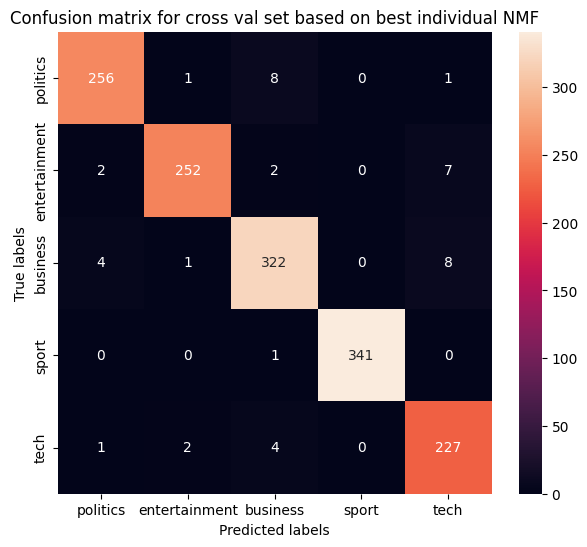

In [72]:
y_pred_best_model = predict_nmf_from_result(best_NMF_model,train_df_full)
y_true = train_df_full['Category']
acc_best_model = metrics.accuracy_score(y_true,y_pred_best_model)
print('The accuracy of the best individual NMF model evaluated on full train + cross val set is: {:.3f}%'.format(acc_best_model*100))
MyData.plot_confusion_matrix(y_true,y_pred_best_model,'Confusion matrix for cross val set based on best individual NMF')

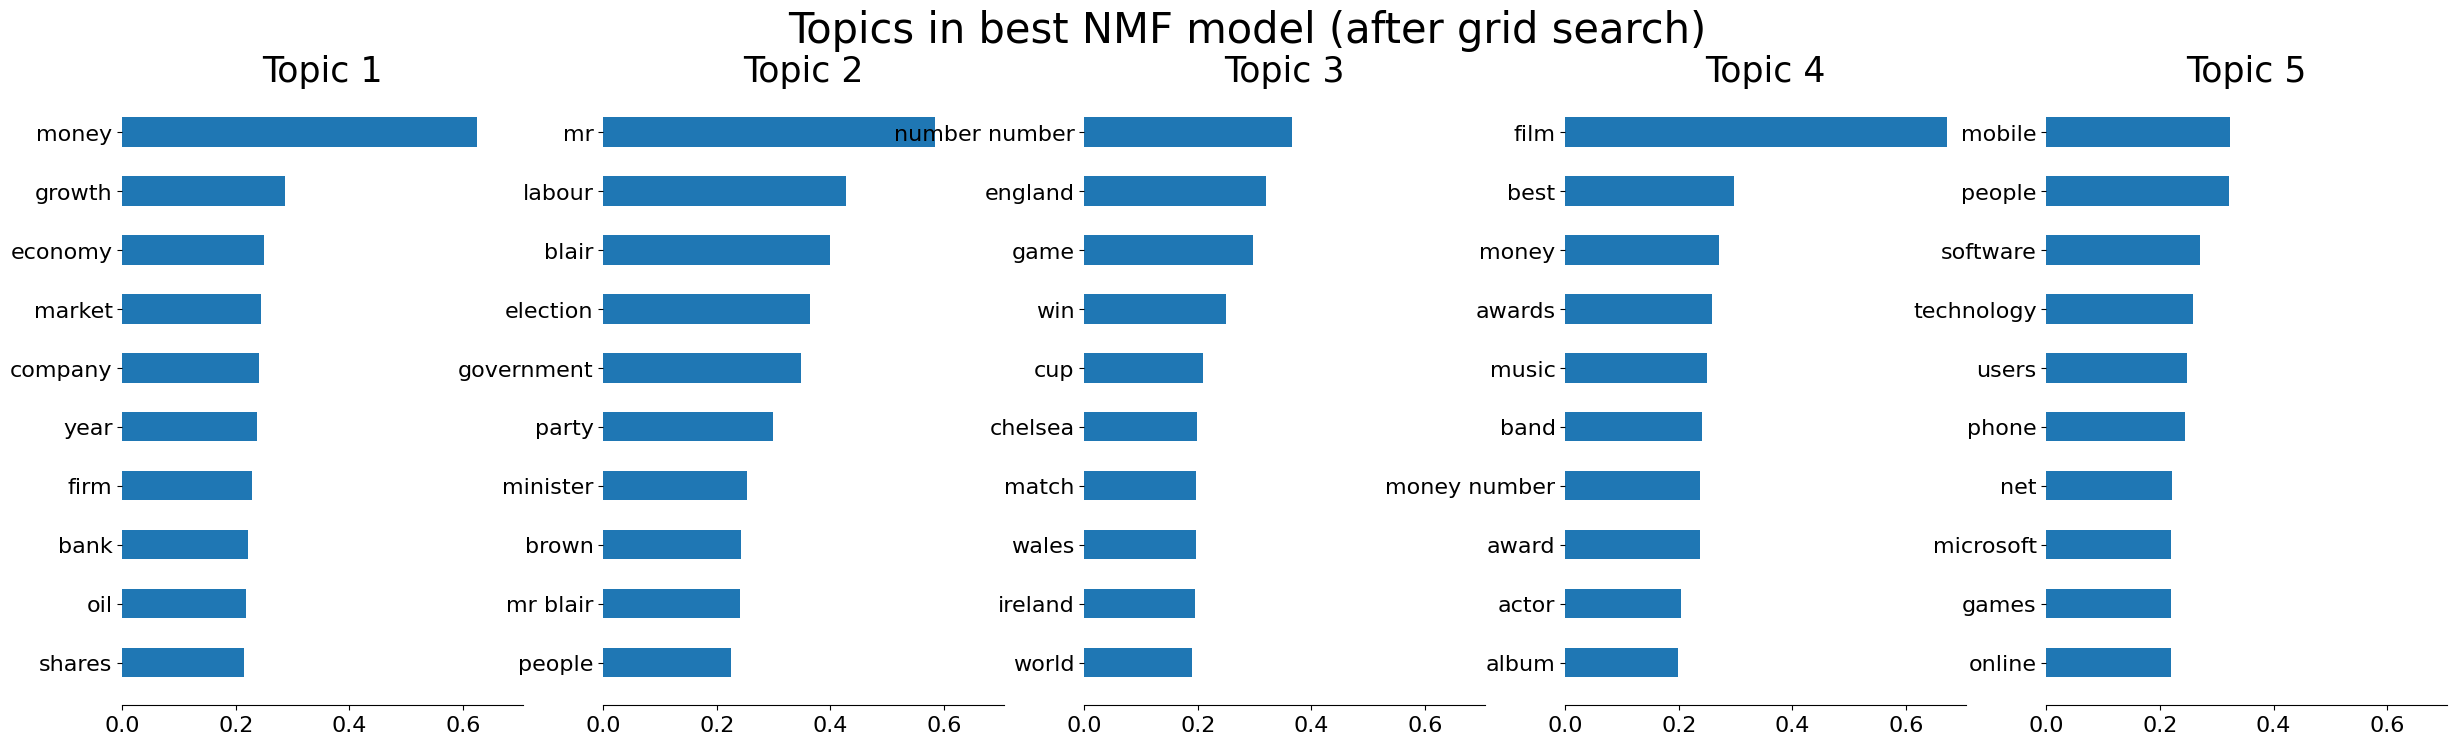

In [73]:
MyNMF.plot_topic_words(H=best_NMF_model['nmf_model'].model_.components_,
                       words = best_NMF_model['nmf_model'].words_,
                       n_words = 10,
                       title = "Topics in best NMF model (after grid search)")

#### Retraining the best model

Now that we found the best hyperparameters, we can probably improve the resutls by increasing the training set size. The reason will become clear when the learning curve is evaluated later in this document.

The training accuracy of the NMF model with best hyperparameters retrained on full train + cross val set is: 96.736%


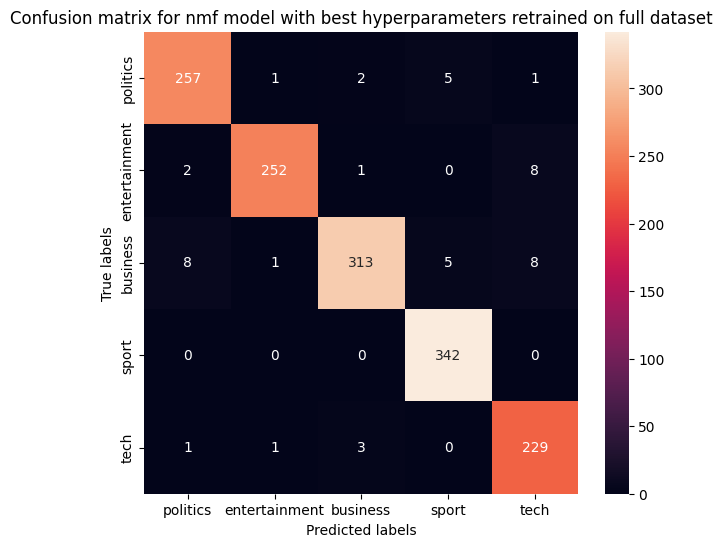

In [74]:
best_NMF_model_retrained = retrain_model(best_NMF_model,train_df_full)
y_pred_best_model = predict_nmf_from_result(best_NMF_model_retrained,train_df_full)
acc_best_model = metrics.accuracy_score(y_true,y_pred_best_model)
print('The training accuracy of the NMF model with best hyperparameters retrained on full train + cross val set is: {:.3f}%'.format(acc_best_model*100))
MyData.plot_confusion_matrix(y_true,y_pred_best_model,'Confusion matrix for nmf model with best hyperparameters retrained on full dataset')

Interestingly, the training accuracy is probably lower when using more data (if not, run the cell again and it will eventually happen)! What has happened here? We trained a model in a fraction of the data and evaluated its accuracy on the full data set, and its accuracy was higher than when the model with same hyperapameters was trained with the full dataset = train + cross val.

Explanation: NMF converges to a (probably different) local minimum each time we fit a model. During grid seach, we ran many models and filtered the ones with highest scores, so we filtered out the local minima with lower scores. We did not filter results when retraining, so we are probably stucked in a local minimum. We could of course repeat the filtering many times on the full training set until we got a higher accuracy, but there is no warranty that results will improve. The reason is that we somehow use all the original data when we applied cross validation to select the best hyperparameters during grid search, so the model has already incorporated some information from the crossed valiation dataset.

#### Conclusions: NMF grid search

* Using grid search for hyperparameter tuning, we were able to increase accuracy of the NMF model by from 88% to 96%.
* After a grid search, retraining with the full dataset (train + cross val) is not likely improve accuracy because it adds no new information.

#### Bagging: combine predictions of different models to reduce variance
Our grid search did not produce a single model, but a set of very good models. We can combine them into a bag of models, where we use use majority voting on the individual model predictions to produce a new estimate of the text category. This is called bagging. Bagging predictions are theoretically more robust than those of a single model, because averaging  N random variables reduces variance by a factor of  
1√N, 
    where  
    N is the number of models in this case (we are using the mode, not the average, but there is a similar effect). This is why we choose bagging over a single model even if the former may sometimes have a slightly smaller cross validation accuracy.

The table we saw before with top models produced by grid search has one problem: some models are actually the same. This is probably because within certain ranges and for certain hyperparameter combinations, hyperparameters such as max_df do not limit model performance. We filter this list of models to keep models that produce unique pairs of train and val accuracy. This subset will become our bag of models.

In [75]:
print('List of different (unique) models to use as a bag of models:')
ALL_MODELS = filter_unique_model_results(ALL_MODELS)
pd.DataFrame(ALL_MODELS)

List of different (unique) models to use as a bag of models:


,train_acc,val_acc,train_data,nmf_model,TtdifVec_params,NMF_params
0,0.972222,0.965278,"MyData( nwords=(1152, 15338) )","NMF(beta_loss='kullback-leibler', init='nndsvd...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
1,0.971354,0.965278,"MyData( nwords=(1152, 15338) )","NMF(beta_loss='kullback-leibler', init='nndsvd...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
2,0.968750,0.965278,"MyData( nwords=(1152, 15339) )","NMF(beta_loss='kullback-leibler', init='nndsvd...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
3,0.967014,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.01, beta_loss='kullback-leibler'...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
4,0.967882,0.965278,"MyData( nwords=(1152, 15339) )","NMF(alpha_W=0.01, beta_loss='kullback-leibler'...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
5,0.973090,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.1, beta_loss='kullback-leibler',...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvdar', 'solver': 'mu', 'beta_los..."


The accuracy of a bag with 6 models on full train+cross val set using majority voting is: 96.875%


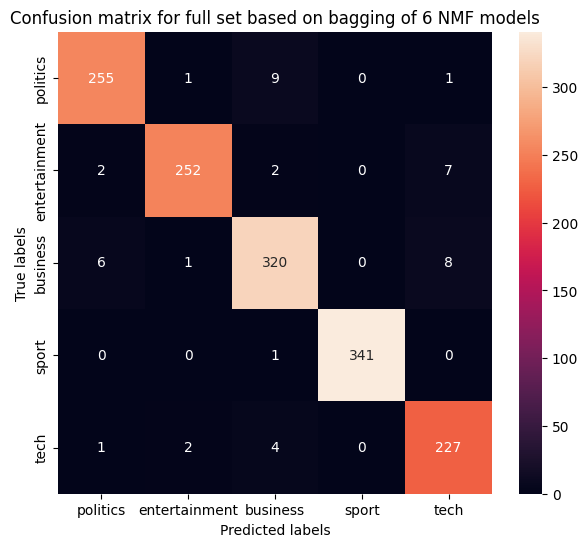

In [76]:
y_pred_bag = bagging_nmf_prediction(ALL_MODELS,train_df_full)
acc_bag = metrics.accuracy_score(y_true,y_pred_bag)
print('The accuracy of a bag with {} models on full train+cross val set using majority voting is: {:.3f}%'.format(len(ALL_MODELS),acc_bag*100))
MyData.plot_confusion_matrix(y_true,y_pred_bag,'Confusion matrix for full set based on bagging of {} NMF models'.format(len(ALL_MODELS)))

In [77]:
y_pred_test = bagging_nmf_prediction(ALL_MODELS,test_df)

print('Since bagging reduces variance, we choose bagging. Our submission is based on a bagging of  {} NMF models'.format(len(ALL_MODELS)))
    
# DataFrame for submission
filename = 'submission.csv'
try:
    os.remove("submission.csv") # remove csv file if it exists
except: 
    pass
nmd_predictions = test_data.df.copy()
nmd_predictions['Category']=y_pred_test
nmd_predictions.drop("Text",axis=1,inplace=True)
print('Submission test set predictions with NMF saved as {}'.format(filename))
nmd_predictions.to_csv('submission.csv', index=False)
nmd_predictions

Since bagging reduces variance, we choose bagging. Our submission is based on a bagging of  6 NMF models
Submission test set predictions with NMF saved as submission.csv


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,business
733,206,business


#### Training a Supervised Model
As seen above, NMF is an unsupervised method that can be used to group documents into topics. The only use we did before of the Category column was when we matched the topic id to each of the 5 text categories. Since we actually have the categories, we can use supervised models to solve the category of each BBC News article. That is, we look for a classifier that can take a word embedding as an input and predict a text class. To keep things simple, we will use the same preprocessing and word embedding produced by TfidfVectorizer with the same hyperparameters that produced the best model in our grid search for NMF model hyperparameters.

This means that the classifier  
y =f(X) will be working directly on the matrix WC2:

##### Category = f(WC2)

In [78]:
print('The following Hyperparameters of TfidfVectorizer were found to produce best result for NMF models, and will be used to pre-process the inputs of the supervised model:')
TtdifVec_params = best_NMF_model['TtdifVec_params']
print(TtdifVec_params)
Xdata = MyData(train_df,TfidfVec=None,clean_text=True,**TtdifVec_params)

The following Hyperparameters of TfidfVectorizer were found to produce best result for NMF models, and will be used to pre-process the inputs of the supervised model:
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.5, 'min_df': 0.002}


#### Analyze the problem to select a classifier.
We know that WC2 (our input) is a sparse, real valued matrix. But let us examine the dimensionality of this problem.

In [79]:
Xtrain = Xdata.WC2
ytrain = train_df['Category']
s = 1 - WC2.count_nonzero()/np.prod(WC2.shape)
print('\nWC2 will be named Xtrain. This is a sparse matrix of size {} with sparsity = {:.2f}%'.format(Xtrain.shape,100*s))
print("\nBased on WC2, we will be training a model with {} inputs and {}  samples".format(Xtrain.shape[1],Xtrain.shape[0]))


WC2 will be named Xtrain. This is a sparse matrix of size (1152, 15338) with sparsity = 99.23%

Based on WC2, we will be training a model with 15338 inputs and 1152  samples


Remarks

* The fact that we have a real valued sparse matrix with more features than samples and a large number of features is an important insight.
* We should not expect good results from models that suffer from the curse of dimensionality, such as KNN.
* Recall The presence of unique words per category is an important indicator, while as universal words may be irrelevant.
* Support vector machines and random forest models are good candidates. The latter do not need scaling of the variables, so we will use them for convenience
* Another alternative could be tu use gradient boosting using with a random subset of varaibes.
* As an alterantive, we could apply dimensionality reduction on X (i.e. WC2) to fit another type of model.

#### Training and performance of a random forest model
Let us start by fitting a random forest model with default parameters on the training data split and evaluating its accuracy with the cross validation set.

In [80]:
from sklearn.ensemble import RandomForestClassifier

The accuracy of our first random forest classifier on the cross validation set is 95.14%


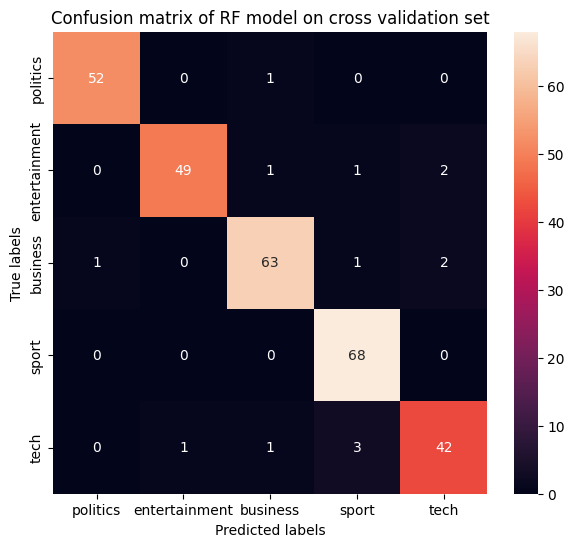

In [81]:
#Create a Gaussian Classifier
rf_model=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf_model.fit(Xtrain,ytrain)
# Cross validaton set
Xcv = MyData(crossval_df,TfidfVec=Xdata.tv,clean_text=True,**TtdifVec_params).WC2
y_pred_cv=rf_model.predict(Xcv)
y_true_cv = crossval_df['Category']
rf_cv_acc = metrics.accuracy_score(y_true_cv,y_pred_cv)
print('The accuracy of our first random forest classifier on the cross validation set is {:.2f}%'.format(rf_cv_acc*100))
MyData.plot_confusion_matrix(y_true_cv,y_pred_cv,"Confusion matrix of RF model on cross validation set")


By using random forest with default parameters, it was quite easy to get a 95% accuracy on the testing set.

#### Hyperparameter tuning of a random forest model
As we did with the NMF model, agrid search over the hyperparameter can be applied to maximize accuracy. In this case, we will not be changing the word embedding, so we can directly apply the grid search method in sklearn package. GridSearchCV uses k-fold cross validation, so we can pass the full training dataset.

An important hyperparameter of random forests is max_features. The options 'log2' and 'sqrt' corresponde approximatly to these numbers:

In [82]:
print('Number of features in input data:',WC2.shape[1])
print('log2(N_features): {:.1f}'.format(np.log2(WC2.shape[1])))
print('sqrt(N_features): {:.1f}'.format(np.sqrt(WC2.shape[1])))

Number of features in input data: 25277
log2(N_features): 14.6
sqrt(N_features): 159.0


In [83]:
from sklearn.model_selection import GridSearchCV

We will also try an intermediate value for this hyperparameters.

In [84]:
Xtrain_full = MyData(train_df_full,TfidfVec=Xdata.tv,clean_text=True,**TtdifVec_params).WC2
ytrain_full = train_df_full['Category']

# Create a Random Forest Classifier
clf=RandomForestClassifier(n_jobs=-1)

# Hyperparameters (the original search space was larger)
parameters = {
    'n_estimators' : [100,250],
    'criterion' : ('gini','entropy'),
    'max_depth' : (None,50,100),
    'max_features' : ('sqrt','log2',50),
    }
# Grid search
print('Tuning hyperparameters')
clf2 = GridSearchCV(clf, parameters, verbose = 3)
clf2.fit(Xtrain_full,ytrain_full)

Tuning hyperparameters
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.938 total time=  21.6s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.913 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.944 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.962 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.962 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=250;, score=0.944 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=250;, score=0.927 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=250;, score=0.962 total time=   1.3s
[CV

[CV 4/5] END criterion=gini, max_depth=100, max_features=log2, n_estimators=100;, score=0.965 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=100, max_features=log2, n_estimators=100;, score=0.969 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=100, max_features=log2, n_estimators=250;, score=0.944 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=100, max_features=log2, n_estimators=250;, score=0.948 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=100, max_features=log2, n_estimators=250;, score=0.955 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=100, max_features=log2, n_estimators=250;, score=0.962 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=100, max_features=log2, n_estimators=250;, score=0.948 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=100, max_features=50, n_estimators=100;, score=0.955 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=100, max_features=50, n_estimators=100;, score=0.927 total 

[CV 1/5] END criterion=entropy, max_depth=50, max_features=50, n_estimators=250;, score=0.941 total time=   1.2s
[CV 2/5] END criterion=entropy, max_depth=50, max_features=50, n_estimators=250;, score=0.924 total time=   1.2s
[CV 3/5] END criterion=entropy, max_depth=50, max_features=50, n_estimators=250;, score=0.965 total time=   1.2s
[CV 4/5] END criterion=entropy, max_depth=50, max_features=50, n_estimators=250;, score=0.962 total time=   1.2s
[CV 5/5] END criterion=entropy, max_depth=50, max_features=50, n_estimators=250;, score=0.962 total time=   1.2s
[CV 1/5] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=100;, score=0.938 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=100;, score=0.917 total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=100;, score=0.965 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=100;, sc

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (None, 50, 100),
                         'max_features': ('sqrt', 'log2', 50),
                         'n_estimators': [100, 250]},
             verbose=3)

In [85]:
print("Highest accuracy for RF hyperparameter tuning is: {:.3f}%".format(clf2.best_score_ ))
R = pd.DataFrame(clf2.cv_results_)
print("Showing top 10 models")
R = R.sort_values(by="rank_test_score",axis=0)
R.head(10)

Highest accuracy for RF hyperparameter tuning is: 0.956%
Showing top 10 models


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,1.851085,0.014627,0.086717,0.004455,entropy,100,sqrt,250,"{'criterion': 'entropy', 'max_depth': 100, 'ma...",0.954861,0.927083,0.968750,0.965278,0.965278,0.956250,0.015309,1
1,1.289465,0.027897,0.068778,0.006841,gini,None,sqrt,250,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.944444,0.927083,0.961806,0.972222,0.968750,0.954861,0.016868,2
13,1.639204,0.027574,0.086288,0.003875,gini,100,sqrt,250,"{'criterion': 'gini', 'max_depth': 100, 'max_f...",0.944444,0.930556,0.972222,0.965278,0.961806,0.954861,0.015215,2
19,1.847759,0.019656,0.092559,0.005943,entropy,None,sqrt,250,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.940972,0.923611,0.965278,0.968750,0.968750,0.953472,0.018189,4
7,1.611984,0.024097,0.087280,0.004460,gini,50,sqrt,250,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.944444,0.923611,0.965278,0.965278,0.961806,0.952083,0.016197,5
16,0.510861,0.010134,0.039865,0.001199,gini,100,50,100,"{'criterion': 'gini', 'max_depth': 100, 'max_f...",0.954861,0.927083,0.961806,0.961806,0.954861,0.952083,0.012880,6
17,1.143140,0.017109,0.092245,0.001653,gini,100,50,250,"{'criterion': 'gini', 'max_depth': 100, 'max_f...",0.937500,0.930556,0.958333,0.968750,0.961806,0.951389,0.014731,7
15,0.866467,0.045104,0.086409,0.002447,gini,100,log2,250,"{'criterion': 'gini', 'max_depth': 100, 'max_f...",0.944444,0.947917,0.954861,0.961806,0.947917,0.951389,0.006211,7
11,1.109665,0.066296,0.094206,0.005281,gini,50,50,250,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.944444,0.916667,0.965278,0.965278,0.965278,0.951389,0.019145,7
3,0.722024,0.012737,0.068021,0.007198,gini,None,log2,250,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.947917,0.930556,0.947917,0.965278,0.965278,0.951389,0.012992,7


Apparently, some models using only log2 features are among the top 10 models. We are interested in these models because they are simpler (less parameters) and run faster than models with similar accuracy. Applying Occam's razor, these are to be preferred.

In [86]:
# Filter best simple model
# R =  R[(R['rank_test_score']<=10) & (R['param_max_features']=='log2')].iloc[0]
R =  R.iloc[0]
print('Parameters for the chosen model, with accuracy = {:.3f}%:'.format(R['mean_test_score']*100))
best_RF_model_params=R['params']
best_RF_model_params

Parameters for the chosen model, with accuracy = 95.625%:


{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'sqrt',
 'n_estimators': 250}

We will use these parameters to retrain a model using only the reduced train data set and produce the confusion matrix on the cross validation set.

The accuracy of tuned random forest classifier on the cross validation set is 95.486%


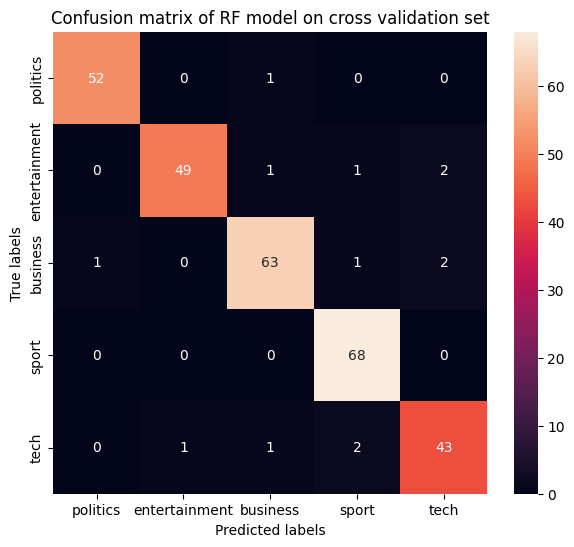

In [87]:
# Retrain model
rf_model = RandomForestClassifier(n_jobs=-1,**best_RF_model_params)
rf_model.fit(Xtrain,ytrain)
y_pred_cv=rf_model.predict(Xcv)
y_true_cv = crossval_df['Category']
rf_cv_acc = metrics.accuracy_score(y_true_cv,y_pred_cv)
print('The accuracy of tuned random forest classifier on the cross validation set is {:.3f}%'.format(rf_cv_acc*100))
MyData.plot_confusion_matrix(y_true_cv,y_pred_cv,"Confusion matrix of RF model on cross validation set")

#### |Feature importance in Random Forest model

Text(0.5, 1.0, 'Classification importance of top 10 words in random forest model')

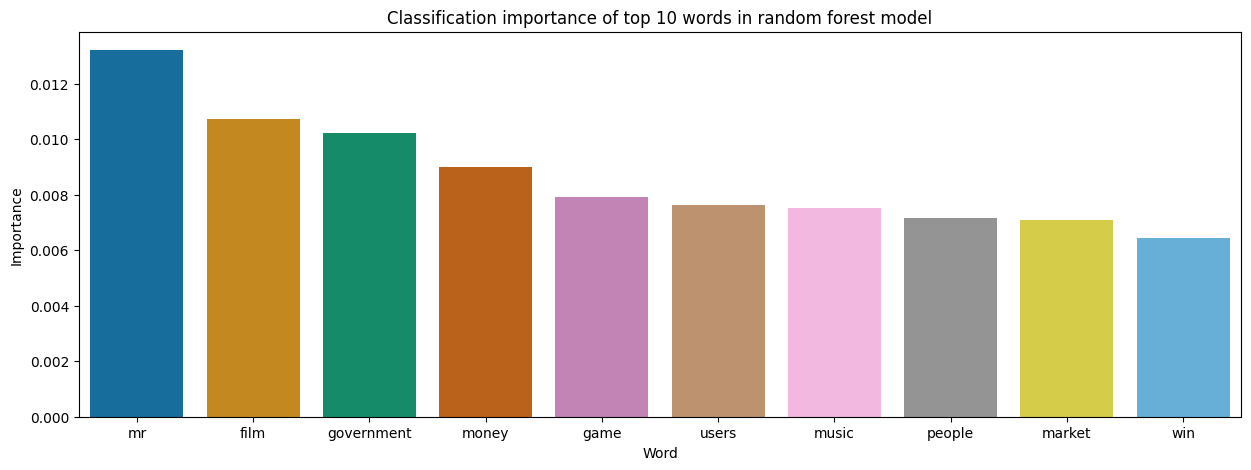

In [88]:
rf_model.feature_importances_
forest_importances = pd.Series(rf_model.feature_importances_, index=Xdata.words,name='importance')
forest_importances.sort_values(axis=0,ascending=False,inplace=True)
fig, axs = plt.subplots(figsize=(15,5))
sns.barplot(x=forest_importances.head(10).index,y=forest_importances.head(10).values,palette='colorblind',ax=axs);
axs.set_xlabel('Word')
axs.set_ylabel('Importance')
axs.set_title('Classification importance of top 10 words in random forest model')

#### Conclusions

Keeping the word embedding constant, Random Forest models achieve a lower accuracy (~95%) than fine tuned NMF models (~96%).
The word money which we introduced, is among the 10 most important words for classifacion with RF models as well.

#### |Effect of the data size in unsupervised NMF model vs supervised RF model.
Let us keep the word embedding and model hyperparametes constant and explore the learning curve of the models by examining accuracy as a funcion of data size during the training. We will use a fixed the cross validation set for evaluating accuracy, and train the models with 10% to 100% of the remaining training set.

This will take a few minutes.

In [89]:
from sklearn.model_selection import learning_curve

In [90]:
# learning_curve
print('Computing learning curve for Random Forest model...\n')
rf_model = RandomForestClassifier(n_jobs=-1,**best_RF_model_params)
train_sizes, train_scores, test_scores = learning_curve(
        rf_model,
        Xtrain_full,
        ytrain_full,
        verbose=3)

Computing learning curve for Random Forest model...

[learning_curve] Training set sizes: [ 115  374  633  892 1152]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=1.000, test=0.646) total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.903) total time=   0.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.938) total time=   0.9s
[CV] END ..................., score=(train=1.000, test=0.944) total time=   1.1s
[CV] END ..................., score=(train=1.000, test=0.944) total time=   1.4s
[CV] END ..................., score=(train=1.000, test=0.674) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=0.885) total time=   0.6s
[CV] END ..................., score=(train=1.000, test=0.903) total time=   0.9s
[CV] END ..................., score=(train=1.000, test=0.910) total time=   1.2s
[CV] END ..................., score=(train=1.000, test=0.927) total time=   1.5s
[CV] END ..................., score=(train=1.000, test=0.681) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=0.920) total time=   0.6s
[CV] END ..................., score=(train=1.000, test=0.944) total time=   0.9s
[CV] END ..................., score=(train=1.000, test=0.951) total time=   1.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   30.1s finished


In [91]:
def plot_learning_curve(train_sizes,train_scores,test_scores,fig_title,axes=None):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    if axes is None:fig, axes = plt.subplots(1, 1, figsize=(10, 5))
    
    axes.errorbar(train_sizes,train_scores_mean,1.96*train_scores_std,fmt="o-",label="Training acc");
    axes.errorbar(train_sizes,test_scores_mean,1.96*test_scores_std,fmt="o-",label="Cross-validation acc");
    axes.legend(loc=4);
    axes.set_xlabel('Training size');
    axes.set_ylabel('Accuracy');
    axes.grid()
    axes.set_title(fig_title)

In [92]:
# Manually compute training curve for NMF model for same number of train sizes
train_scores_nmf = np.zeros((5,len(train_sizes)))
test_scores_nmf = np.zeros((5,len(train_sizes)))

train_df, crossval_df = train_test_split(train_df_full,stratify=train_df_full[['Category']],test_size=0.2,random_state = 310)

for  i,s in tqdm(enumerate(train_sizes),desc='Computing NMF model training curve with 5-fold validaton',total=len(train_sizes)): 
    for j in range(5):
        try:
            train_df_sub, _ = train_test_split(train_df,stratify=train_df[['Category']],train_size=s)        
        except ValueError:
            train_df_sub = train_df
            
        results = test_model_params(train_df_sub,
                                    best_NMF_model['TtdifVec_params'],
                                    best_NMF_model['NMF_params'],crossval_df)
        train_scores_nmf[i,j] = results['train_acc']
        test_scores_nmf[i,j] =results['val_acc']

Computing NMF model training curve with 5-fold validaton: 100%|██████████████████████████| 5/5 [01:02<00:00, 12.43s/it]


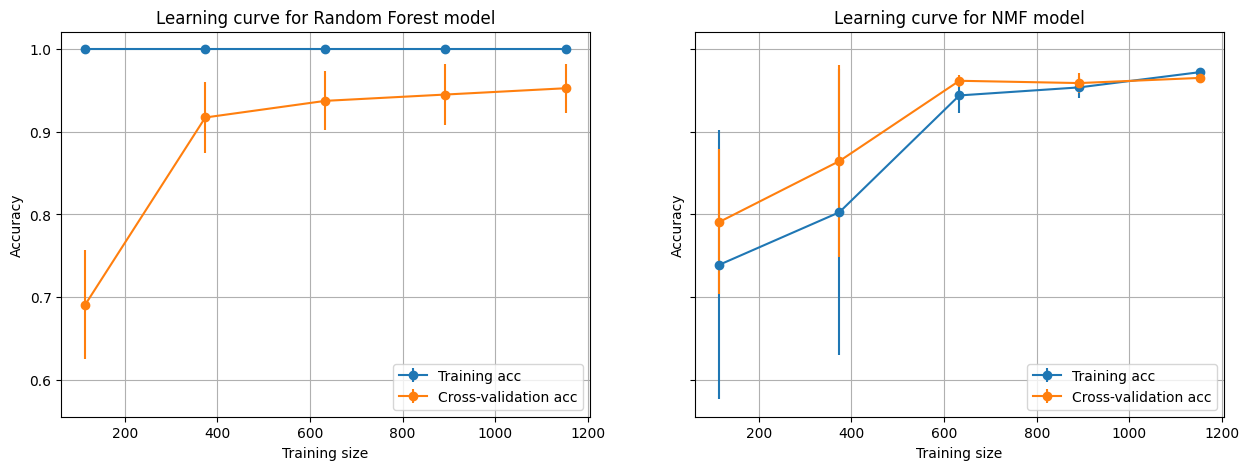

In [93]:
# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5),sharey=True)
plot_learning_curve(train_sizes,train_scores,test_scores,'Learning curve for Random Forest model',axes[0])
plot_learning_curve(train_sizes,train_scores_nmf,test_scores_nmf,'Learning curve for NMF model',axes[1])

#### Conclusions

The Random forest model has a training accuracy close to 100%, whileas the cross validation accuracy is asymptotically lower. This means that there is variance in the model. Getting more data could help, but not much, due to the asymptotic behavior.
The NMF model has a very different learning curve, where both training an cross validation accuracy start with low values around and grow steadily without reaching 100%. It is an unsupervised model so is is directly trying to group the dataset into 5 topics. The training and cross validation accuracies remain similar to each other, but the error bars reveal that predictions are unstable when using less than 600 articles for training. Increasing the size of the dataset may help increase the accuracy of this NMF model, but it might reach a maximum below 100%. As a consequence, it makes sense to find a way to get more training data.

In [94]:
import pickle

In [95]:
file = open('model.pkl', 'wb')

pickle.dump(ALL_MODELS, file)

In [98]:
import joblib

joblib.dump(ALL_MODELS, 'model.pkl', protocol=4)  # Use an appropriate protocol version

['model.pkl']